In [1]:
import os
import pickle
import time
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tfold.utils import utils

from tfold.utils import seq_tools
seq_tools.load_mhcs()

date_cutoff='2018-04-30' #AlphaFold training set cutoff

MHC loading from MHC.pckl. To update the pickle file, set use_pickle to False
loaded 26122 MHC sequences in  4.5 s


In [2]:
structure_dir='./data/experimental_structures/processed_updated'
print(os.listdir(structure_dir))
with open(structure_dir+'/complexes.pckl','rb') as f:
    complexes=pickle.load(f)
print(len(complexes))
with open(structure_dir+'/complex_seq_clusters.pckl','rb') as f:
    complex_clusters=pickle.load(f)
print(len(complex_clusters))
with open(structure_dir+'/pmhcs.pckl','rb') as f:
    pmhcs=pickle.load(f)
print(len(pmhcs))
with open(structure_dir+'/pmhcs_seq_clusters.pckl','rb') as f:
    pmhcs_clusters=pickle.load(f)
print(len(pmhcs_clusters))
pmhcs_df=pd.read_pickle(structure_dir+'/pmhcs_df.pckl')
print(len(pmhcs_df))
print(pmhcs_df.columns)
with open(structure_dir+'/summary.pckl','rb') as f:
    summary=pickle.load(f)
print(len(summary))

#with open(structure_dir+'/contact_maps_pmhc-tcr.pckl','rb') as f:
#    cmaps=pickle.load(f)
#print(type(cmaps),cmaps.keys())
#with open('./data/seq_tools/TCR/ss.pckl','rb') as f:
#    tcr_ss=pickle.load(f) #np.array of per-residue-n segment names
    
    
#note: for debugging A02665 and some other other stuff below, used old data:
#structure_dir='./data/experimental_structures/processed_updated_old'

['pdb', 'proteins', 'pdb_info', 'debug', 'contact_maps', 'pdb_rotated', 'pep_rmsd_to_template.pckl', 'peptide_coords_CA.pckl', 'peptide_coords_CB.pckl', 'mmcif', 'summary.pckl', 'pmhcs.pckl', 'tcrs.pckl', 'complexes.pckl', 'pmhcs_seq_clusters.pckl', 'tcrs_seq_clusters.pckl', 'complex_seq_clusters.pckl', 'pmhcs_CA_clusters.pckl', 'templates', 'pmhcs_df.pckl', 'pmhcs_seq_clusters_filtered.pckl']
247
178
928
486
928
Index(['id', 'class', 'cluster_seq', 'cluster_CA', 'date', 'pep', 'tails',
       'linker', 'mhc_a_allele', 'mhc_b_allele', 'netmhc_core', 'netmhc_kd',
       'netmhc_tails'],
      dtype='object')
2382


# debug A*02:665

In [ ]:
## DEBUG A*02:665 AND SUCH ##

#answer:
#0201 and 02665 differ in single aa far in the constant region. That part is missing in pdb files (typically?),
#therefore, blast uses (aa,gap) matrix element. This gives higher score for 02665, even though the aa that is different
#is not within pdb sequence. Conclusion: rename by g-region!

In [69]:
#A02:01 vs A02:6..:
mhcs=[]
mhcs_i=[]
for x in pmhcs_clusters:
    y=pmhcs[x['pmhc_ids'][0]]
    pdb_id=x['pdbs'][0][0]
    z=y['M']['info']
    mhc=z['locus']+'*'+z['allele']
    if mhc.startswith('A*02'):
        mhcs.append([pdb_id,mhc])
    if y['M']['info']['class']=='I':
        mhcs_i.append([pdb_id,mhc])
mhcs=pd.DataFrame(mhcs,columns=['pdb','allele'])
print(len(mhcs))
mhcs_i=pd.DataFrame(mhcs_i,columns=['pdb','allele'])
print(len(mhcs_i))

85
366


In [72]:
mhcs_i['allele'].unique() #solution: make reduction dict for alleles w. shared G-region

array(['A*11:394', 'B*35:516', 'B*37:87', 'D*b', 'K*b', 'D*d', 'A*24:352',
       'A*02:722', 'K*wm7', 'B*57:103', 'C*05:145', 'L*d', 'A*02:665',
       'BF2*015:01', 'B*08:173', 'A*11:263', 'B*35:08', 'K*d', 'B*57:01',
       'B*15:443', '1*04:01', 'A*02:888', 'G*01:04', 'C*06:239',
       'B*58:108', 'B*44:02', 'B*39:01', 'B*27:195', 'A*03:358',
       'BF2*012:01', 'B*57:03', 'B*15:02', 'B*81:02', 'C*08:01',
       'A*68:01', 'A*02:957', 'B*57:06', 'A*24:473Q', 'B*07:381',
       'B*27:09', 'BF2*021:01', 'A1*065:03', '2*11:04', 'B*07:02',
       'A*68:188', 'C*03:466', 'C*06:277', 'A*av1', 'A*24:402',
       'BF2*014:01', 'B*08:222', 'E*01:14', '18*001:02', 'A*02:233',
       '1*13:01', 'K*k', 'B*08:225', '1*15:01', 'B*07:311', 'BF2*004:01',
       'B*40:384', 'B*44:05', 'A*30:03', '1*07:04', 'B*14:02', 'B*44:302',
       '16*003:01', 'C*04:358', 'A*03:338', 'A*01:387', '2*012:01',
       '6*013:01', 'UBA*14:01', '1*14:02', 'E*01:03', 'B*40:379', 'A*f',
       'A*01:325', 'B*07:339'

In [40]:
mhcs['allele'].value_counts()

A*02:665    68
A*02:722     9
A*02:888     2
A*02:957     1
A*02:233     1
A*02:779     1
A*02:704     1
A*02:820     1
A*02:742     1
Name: allele, dtype: int64

In [46]:
mhcs

,pdb,allele
0,6o53_0,A*02:722
1,7p3d_0,A*02:665
2,1eey_0,A*02:665
3,2gtw_0,A*02:665
4,3kla_0,A*02:665
...,...,...
80,6nca_0,A*02:665
81,3bh9_0,A*02:665
82,6apn_0,A*02:742
83,3rew_0,A*02:665


In [73]:
#from tfold.utils import seq_tools
import importlib
importlib.reload(seq_tools)
seq_tools.load_mhcs()

MHC loading from MHC.pckl. To update the pickle file, set use_pickle to False
loaded 26122 MHC sequences in  2.6 s


In [45]:
seq0201=seq_tools.mhcs['9606','A','02:01'].seq()
for x in mhcs['allele'].unique():
    seq=seq_tools.mhcs['9606','A',x[2:]].seq()
    print(x,'!'*int(seq!=seq0201)) #mismatches in sequences

A*02:722 
A*02:665 
A*02:888 !
A*02:957 
A*02:233 !
A*02:779 
A*02:704 
A*02:820 
A*02:742 


In [18]:
with open('./data/seq_tools/db/MHC.fasta') as f:
    s=f.read().split('\n')
keep=False
keep_list=['>MHC 9606 1 A A 02:01','>MHC 9606 1 A A 02:665']
d={}
for i,line in enumerate(s):
    if line in keep_list:
        d[line]=s[i+1]
print(d)        

{'>MHC 9606 1 A A 02:01': 'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV', '>MHC 9606 1 A A 02:665': 'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIAIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV'}


In [21]:
d1,d2=list(d.values())
print(len(d1),len(d2))
for x,y in zip(d1,d2):
    print(x,y,'!'*int(x!=y))

365 365
M M 
A A 
V V 
M M 
A A 
P P 
R R 
T T 
L L 
V V 
L L 
L L 
L L 
S S 
G G 
A A 
L L 
A A 
L L 
T T 
Q Q 
T T 
W W 
A A 
G G 
S S 
H H 
S S 
M M 
R R 
Y Y 
F F 
F F 
T T 
S S 
V V 
S S 
R R 
P P 
G G 
R R 
G G 
E E 
P P 
R R 
F F 
I I 
A A 
V V 
G G 
Y Y 
V V 
D D 
D D 
T T 
Q Q 
F F 
V V 
R R 
F F 
D D 
S S 
D D 
A A 
A A 
S S 
Q Q 
R R 
M M 
E E 
P P 
R R 
A A 
P P 
W W 
I I 
E E 
Q Q 
E E 
G G 
P P 
E E 
Y Y 
W W 
D D 
G G 
E E 
T T 
R R 
K K 
V V 
K K 
A A 
H H 
S S 
Q Q 
T T 
H H 
R R 
V V 
D D 
L L 
G G 
T T 
L L 
R R 
G G 
Y Y 
Y Y 
N N 
Q Q 
S S 
E E 
A A 
G G 
S S 
H H 
T T 
V V 
Q Q 
R R 
M M 
Y Y 
G G 
C C 
D D 
V V 
G G 
S S 
D D 
W W 
R R 
F F 
L L 
R R 
G G 
Y Y 
H H 
Q Q 
Y Y 
A A 
Y Y 
D D 
G G 
K K 
D D 
Y Y 
I I 
A A 
L L 
K K 
E E 
D D 
L L 
R R 
S S 
W W 
T T 
A A 
A A 
D D 
M M 
A A 
A A 
Q Q 
T T 
T T 
K K 
H H 
K K 
W W 
E E 
A A 
A A 
H H 
V V 
A A 
E E 
Q Q 
L L 
R R 
A A 
Y Y 
L L 
E E 
G G 
T T 
C C 
V V 
E E 
W W 
L L 
R R 
R R 
Y Y 
L L 
E E 
N N 
G 

In [74]:
seq='GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEP'
print(seq0201 in seq)
x=seq_tools.mhc_from_seq(seq)
x.info['allele']

True


'02:01'

In [20]:
#example: cl I complexes with same pmhc
pmhc_ids=[x['pmhc_id'] for x in complexes]
utils.print_hist(pmhc_ids,order=-1)

104 9
155 7
10  6
135 6
22  6
187 4
80  4
511 3
541 3
149 3
145 3
659 3
200 3
92  3
90  3
202 3
332 3
49  3
19  3
412 2
132 2
15  2
240 2
115 2
113 2
251 2
23  2
224 2
16  2
565 2
573 2
182 2
404 2
65  2
589 2
177 2
568 1
547 1
406 1
410 1
583 1
553 1
424 1
423 1
522 1
520 1
513 1
415 1
467 1
418 1
461 1
456 1
455 1
452 1
433 1
427 1
527 1
3   1
631 1
596 1
827 1
820 1
814 1
813 1
802 1
790 1
777 1
774 1
766 1
750 1
746 1
744 1
743 1
738 1
587 1
736 1
726 1
702 1
680 1
673 1
670 1
653 1
647 1
634 1
403 1
630 1
622 1
620 1
616 1
604 1
734 1
400 1
304 1
383 1
179 1
176 1
173 1
168 1
165 1
129 1
127 1
119 1
118 1
117 1
112 1
102 1
96  1
93  1
91  1
76  1
75  1
70  1
63  1
62  1
59  1
54  1
51  1
35  1
27  1
20  1
14  1
13  1
6   1
180 1
394 1
181 1
192 1
373 1
353 1
350 1
348 1
340 1
337 1
336 1
329 1
321 1
319 1
314 1
849 1
292 1
291 1
278 1
267 1
259 1
258 1
248 1
242 1
237 1
232 1
227 1
219 1
217 1
212 1
209 1
206 1
205 1
189 1
884 1


In [159]:
#pmhc_id=104 #104 (ELA), 155 (GIL)
#c_id=17     # 17 (ELA),  26  (GIL)
pmhc_id=155 #104 (ELA), 155 (GIL)
c_id=26      # 17 (ELA),  26  (GIL)

c=complexes[c_id]
print(c['id'],c['pmhc_id'])
print(''.join(c['P']['data']['seq']),c['M']['info']['locus'],c['M']['info']['allele'])
pdbs={}
for i,c in enumerate(complexes):
    if c['pmhc_id']==pmhc_id:
        pdbs[c['id']]=c['pdbs'][0][0]
        print('{:3d} {:3d} {:3d} {:3d} {:3d} {}'.format(
            c['id'],c['tcr_A_id'],c['tcr_B_id'],c['tcr_A_cluster_seq'],c['tcr_B_cluster_seq'],c['pdbs']))
        print() 
print(pdbs)

26 155
GILGFVFTL A 02:665
 26 100 101  84   1 [('5euo_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.1}), ('5euo_1', {'pep_gaps': 0, 'linker': False, 'resolution': 2.1})]

103 273 274 235 236 [('5jhd_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.46}), ('5jhd_1', {'pep_gaps': 0, 'linker': False, 'resolution': 2.46})]

104   0 277   0   1 [('2vlr_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.3}), ('2vlr_1', {'pep_gaps': 0, 'linker': False, 'resolution': 2.3})]

120   0   1   0   1 [('1oga_0', {'pep_gaps': 0, 'linker': False, 'resolution': 1.4}), ('2vlj_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.4}), ('2vlk_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.5})]

160 355 356 299 300 [('5e6i_0', {'pep_gaps': 0, 'linker': False, 'resolution': 4.0}), ('5e6i_1', {'pep_gaps': 0, 'linker': False, 'resolution': 4.0}), ('5e6i_2', {'pep_gaps': 0, 'linker': False, 'resolution': 4.0}), ('5e6i_3', {'pep_gaps': 0, 'linker': False, 'resolution': 4.0})]

172 378 379 315 3

In [160]:
contact_maps={}
for x,p in pdbs.items():
    with open (f'./data/experimental_structures/processed_updated/contact_maps/{p}.pckl','rb') as f:
        contact_maps[x]=pickle.load(f)

In [143]:
pmhc_res_used=set() #combine over several structures

In [161]:
#goal: cdr1,2,3A,B (6 in total) for each pep and mhc residue
cmaps_reduced={}
#pmhc_res_used=set() combine over several structures
pmhc_res_used=set(pmhc_res_used)
cdr_used=set()
#cid_list=[17,21,37,68,106,161] #ELAGIGILTV
cid_list=[26,103,160,172,173]   #GILGFVFTL
for cid in cid_list:
    c=contact_maps[cid]
    cmaps_reduced[cid]={}    
    for k in [('P','A'),('P','B'),('M','A'),('M','B')]:
        if k not in c:
            reverse=True
            k=k[::-1]
        else:
            reverse=False
        for kk in c[k]:
            if c[k][kk]>0:
                if reverse:
                    kk0=kk[::-1]
                else:
                    kk0=kk
                tcr_res_n=int(kk0[1][1:-1])
                cdr=tcr_ss[tcr_res_n-1]+kk0[1][0] #e.g. CDR3A
                cmaps_reduced[cid].setdefault((kk0[0],cdr),0)
                cmaps_reduced[cid][kk0[0],cdr]+=c[k][kk]
                pmhc_res_used.add(kk0[0])
                cdr_used.add(cdr)
pmhc_res_used=np.sort(list(pmhc_res_used))
cdr_used=np.sort(list(cdr_used))
c_matrices=[]
for cid in cmaps_reduced:
    c_matrices.append(np.zeros((len(pmhc_res_used),len(cdr_used)),dtype=int))
    for k,v in cmaps_reduced[cid].items():
        i0=np.nonzero(pmhc_res_used==k[0])[0][0]
        i1=np.nonzero(cdr_used==k[1])[0][0]
        c_matrices[-1][i0,i1]=v
c_matrices=np.array(c_matrices)
print(pmhc_res_used)
print(cdr_used)
print(c_matrices.shape)
#drop non-cdr:
i_cdr=[i for i,x in enumerate(cdr_used) if x.startswith('CDR')]
i_noncdr=[i for i,x in enumerate(cdr_used) if not x.startswith('CDR')]
print('contacts outside cdr:',np.sum(c_matrices[:,:,i_noncdr]))
c_matrices=c_matrices[:,:,i_cdr]
print('contacts within cdr:',np.sum(c_matrices))
cdr_used=cdr_used[i_cdr]
cdr_permute=[0,2,4,1,3,5]
cdr_used=cdr_used[cdr_permute]
c_matrices=c_matrices[:,:,cdr_permute]
print('reduced cdr:',cdr_used)

['M  58 ' 'M  62 ' 'M  63 ' 'M  65 ' 'M  66 ' 'M  68 ' 'M  69 ' 'M  70 '
 'M  72 ' 'M  73 ' 'M  75 ' 'M  76 ' 'M  80 ' 'M  84 ' 'M1058 ' 'M1061 '
 'M1061A' 'M1062 ' 'M1063 ' 'M1065 ' 'M1066 ' 'M1068 ' 'M1069 ' 'M1070 '
 'M1073 ' 'M1076 ' 'M1077 ' 'M1080 ' 'P   1 ' 'P   2 ' 'P   3 ' 'P   4 '
 'P   5 ' 'P   51' 'P   6 ' 'P   7 ' 'P   8 ']
['C2B' 'CDR1A' 'CDR1B' 'CDR2A' 'CDR2B' 'CDR3A' 'CDR3B']
(5, 37, 7)
contacts outside cdr: 9
contacts within cdr: 290
reduced cdr: ['CDR1A' 'CDR2A' 'CDR3A' 'CDR1B' 'CDR2B' 'CDR3B']


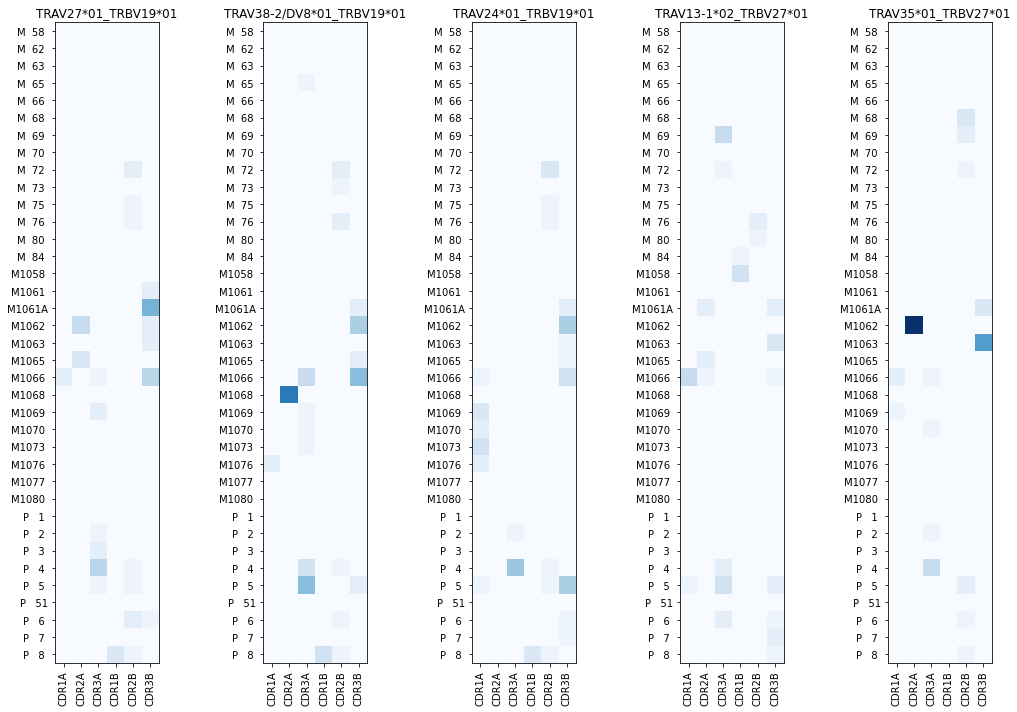

In [162]:
n_max=np.max(c_matrices)
#m_reorder=[0,5,1,2,3,4]  #ELA
m_reorder=[0,1,4,3,2]   #GIL
#m_reorder=np.arange(len(c_matrices))
c_matrices=c_matrices[m_reorder] #reorder by similarity
Vs=[]
for i in m_reorder: #get Vs
    cid=cid_list[i]
    c=complexes[cid]
    Vs.append(c['A']['info']['V']+'_'+c['B']['info']['V'])
plt.figure(figsize=(15,10))
for i,m in enumerate(c_matrices):
    plt.subplot(1,len(c_matrices),i+1)
    plt.imshow(m,vmin=0,vmax=n_max,cmap='Blues')
    plt.xticks(np.arange(m.shape[1]),cdr_used,rotation=90)
    plt.yticks(np.arange(m.shape[0]),pmhc_res_used)
    plt.title(Vs[i])
plt.tight_layout()
plt.show()

In [132]:
s=c_matrices.shape
np.corrcoef(c_matrices.reshape([s[0],s[1]*s[2]]))

array([[1.        , 0.36578472, 0.47374119, 0.30718228, 0.48674393],
       [0.36578472, 1.        , 0.02018615, 0.18761926, 0.41431858],
       [0.47374119, 0.02018615, 1.        , 0.17103206, 0.13461109],
       [0.30718228, 0.18761926, 0.17103206, 1.        , 0.2242036 ],
       [0.48674393, 0.41431858, 0.13461109, 0.2242036 , 1.        ]])

In [121]:
b.keys()

dict_keys(['species', 'chain', 'gaps', 'V', 'J', 'hetero_res'])

# pep geom and contacts: plot together

In [3]:
output_dir='./data/experimental_structures/processed_updated'
date_cutoff='2018-04-30' #AlphaFold training set cutoff

#load pmhcs
with open(output_dir+'/pmhcs.pckl','rb') as f:
    pmhcs=pickle.load(f)
print('pmhcs:',len(pmhcs))
print(pmhcs[0].keys())    
#load clusters
with open(output_dir+'/pmhcs_seq_clusters.pckl','rb') as f:
    pmhcs_clusters=pickle.load(f)
print('pmhcs clusters:',len(pmhcs_clusters))
print(pmhcs_clusters[0])
with open(output_dir+'/complex_seq_clusters.pckl','rb') as f:
    complex_clusters=pickle.load(f)
print('complex clusters:',len(complex_clusters))
print(complex_clusters[0])

pmhc_pdbids=[x['pdbs'][0][0] for x in pmhcs_clusters if x['date']<=date_cutoff]
complex_pdbids=[x['pdbs'][0][0] for x in complex_clusters if x['date']<=date_cutoff]

pmhcs: 896
dict_keys(['P', 'M', 'class', 'pdbs', 'date', 'pep_pdbnum', 'id', 'bound', 'cluster_seq', 'cluster_CA'])
pmhcs clusters: 453
{'id': 0, 'pmhc_ids': array([0]), 'pdbs': [('2hn7_0', {'pep_gaps': 0, 'linker': False, 'resolution': 1.6, 'includes_tcr': 0})], 'date': '2006-07-12'}
complex clusters: 159
{'id': 0, 'complex_ids': [0, 28, 59, 87, 91, 211], 'pdbs': [('6mnn_0', {'pep_gaps': 9, 'linker': True, 'resolution': 2.83}), ('6mno_0', {'pep_gaps': 9, 'linker': True, 'resolution': 2.9}), ('6mnm_0', {'pep_gaps': 9, 'linker': True, 'resolution': 3.1}), ('6mkd_0', {'pep_gaps': 9, 'linker': True, 'resolution': 3.2}), ('6mkr_0', {'pep_gaps': 9, 'linker': True, 'resolution': 3.36}), ('6mng_0', {'pep_gaps': 10, 'linker': True, 'resolution': 2.66})], 'date': '2018-09-25'}


In [6]:
atom='CA' #CA or CB. Rerun the following cells to make plots
with open(output_dir+f'/peptide_coords_{atom}.pckl','rb') as f:
    pep_coords=pickle.load(f)
print(len(pep_coords))
print(pep_coords['1ao7_0'])
#collect coordinates
#exclude=('   53','   57') #too little data, causes sns.violin to show only boxplots
pep_coords_all={'I':{},'II':{}}
for c in pmhcs_clusters:
    pdb_id=c['pdbs'][0][0]
    if pdb_id in pmhc_pdbids: #restrict
        cl=pmhcs[c['pmhc_ids'][0]]['class']
        for res,xyz in pep_coords[pdb_id].items():
            if res>='   08' and res<='  12 ': # and res not in exclude: #cut the tails
            #if res>='   08' and res<='   5 ': #cut the tails
                pep_coords_all[cl].setdefault(res,[]).append(xyz)
#compute dispersions
for v in pep_coords_all.values():
    for k,w in v.items():
        w=np.array(w)
        v[k]=list(np.linalg.norm(w-np.average(w,axis=0),axis=1))   

1856
{'   1 ': array([-16.546,   2.083,   8.472], dtype=float32), '   2 ': array([-15.378,   5.487,   9.689], dtype=float32), '   3 ': array([-16.414,   7.299,  12.881], dtype=float32), '   4 ': array([-19.075,   9.949,  12.251], dtype=float32), '   5 ': array([-18.504,  12.668,  14.837], dtype=float32), '   6 ': array([-14.981,  14.24 ,  14.828], dtype=float32), '   7 ': array([-14.636,  17.502,  16.797], dtype=float32), '   8 ': array([-12.051,  20.31 ,  16.605], dtype=float32), '   9 ': array([-9.37 , 20.396, 19.375], dtype=float32)}


In [7]:
#plotting functions
def dict_to_violin(d,N,title,sort_by_resname=False,figsize=(10,10),ylim=None,min_len=None):
    if type(list(d.keys())[0])==tuple:
        d={'_'.join(k):v for k,v in d.items()}
    if min_len:
        d={k:v for k,v in d.items() if len(v)>=min_len} #drop small lists
    k_list=np.array(list(d.keys()))
    av=np.array([np.average(d[k]) for k in k_list])
    ind=np.argsort(-av)[:N]
    k_list_new=np.array([k_list[i] for i in ind])
    if sort_by_resname:
        ind=np.argsort(k_list_new)
        k_list_new=k_list_new[ind]        
    d_new={k:d[k] for k in k_list_new}    
    ls={k:len(v) for k,v in d_new.items()}
    l_max=max(ls.values())
    k_list_new=['{:4d} '.format(ls[k])+k.replace(' ','') for k in k_list_new]
    d_new={k: v+[np.nan]*(l_max-ls[k]) for k,v in d_new.items()} #normalize len for pandas
    df=pd.DataFrame(d_new)
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.violinplot(data=df,cut=0,scale='width')
    plt.xticks(range(len(k_list_new)),k_list_new,rotation=90)
    if ylim:
        plt.ylim(0,ylim)
    plt.show()

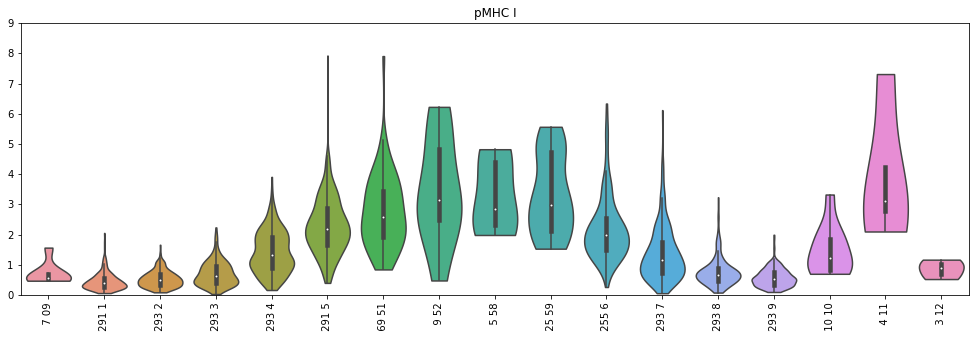

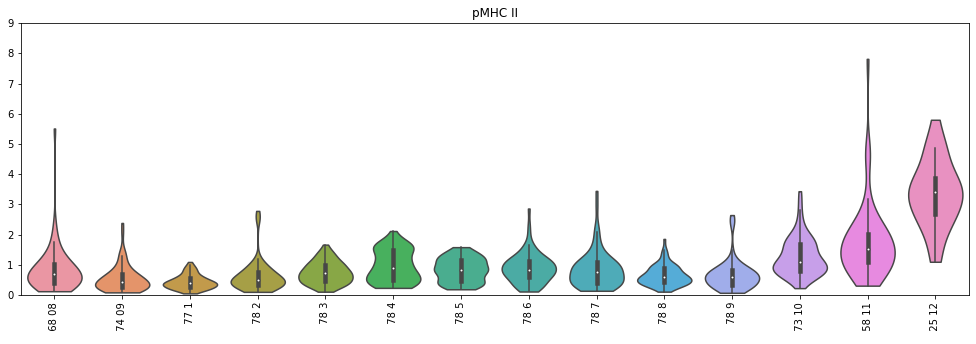

In [10]:
#CA
figsize=(17,5)
dict_to_violin(pep_coords_all['I'],100,'pMHC I',sort_by_resname=True,figsize=figsize,ylim=9,min_len=3)
dict_to_violin(pep_coords_all['II'],100,'pMHC II',sort_by_resname=True,figsize=figsize,ylim=9,min_len=3)

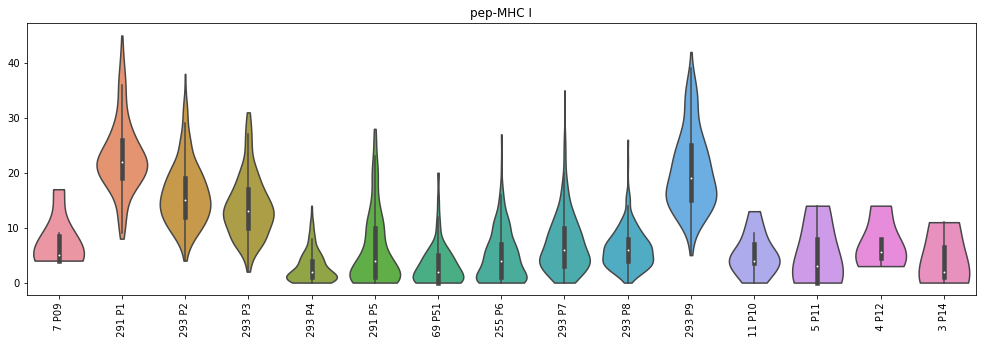

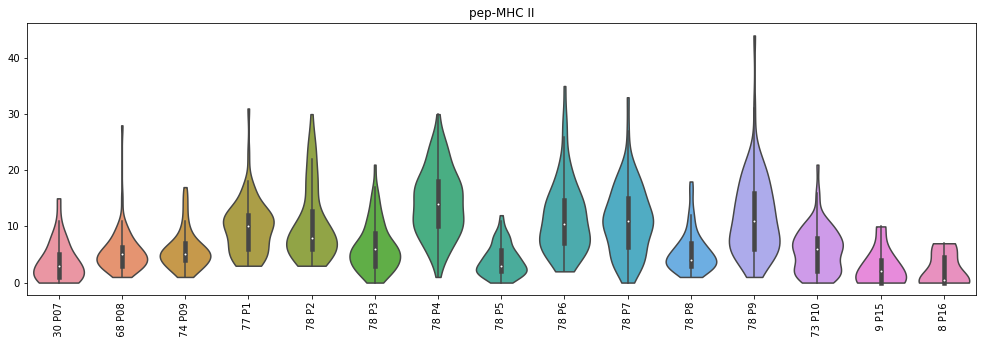

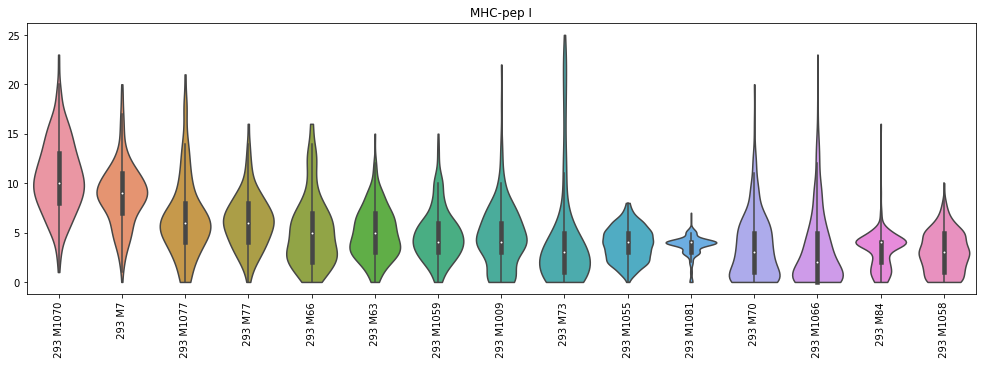

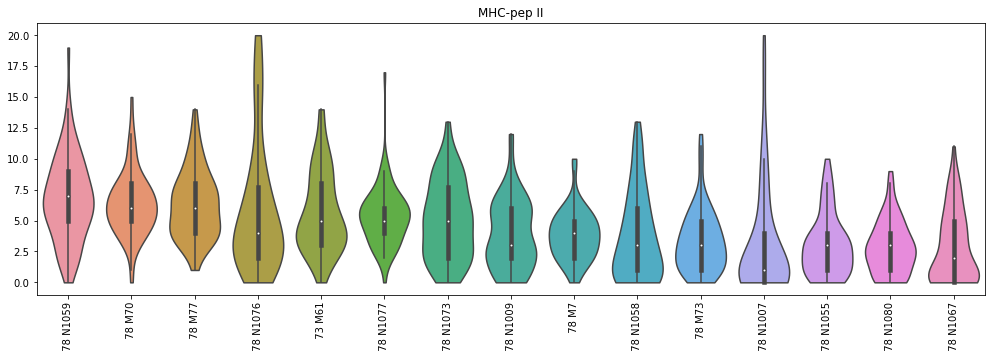

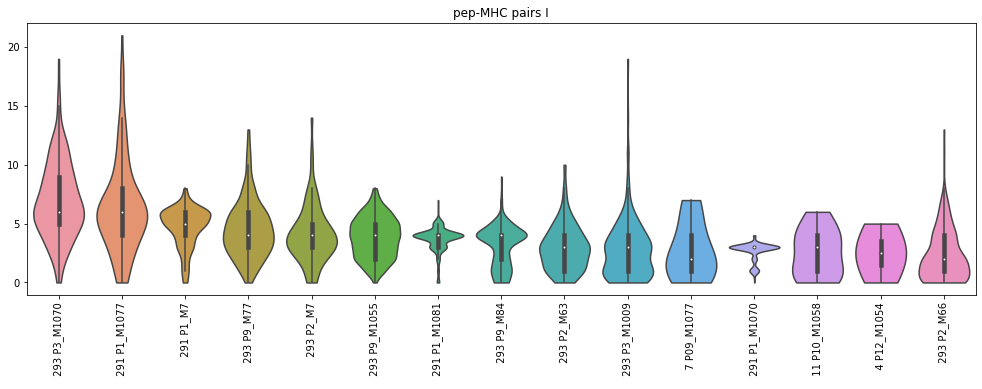

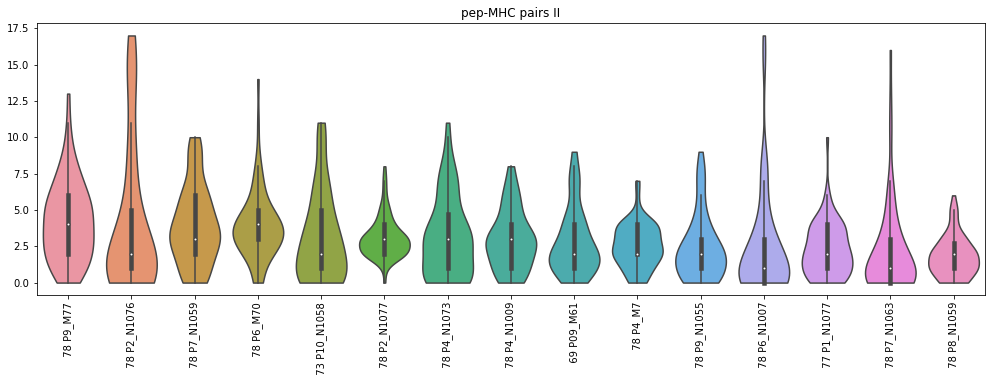

completed in   3.0 s


In [11]:
#plot pep-mhc contacts
t0=time.time()
with open(output_dir+'/contact_maps_pep-mhc.pckl','rb') as f:
    d=pickle.load(f)
res_contacts1,res_contacts2,pair_contacts=d['res_contacts1'],d['res_contacts2'],d['pair_contacts']
figsize=(17,5)
dict_to_violin(res_contacts1['I'],15,'pep-MHC I',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts1['II'],15,'pep-MHC II',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts2['I'],15,'MHC-pep I',sort_by_resname=False,figsize=figsize)
dict_to_violin(res_contacts2['II'],15,'MHC-pep II',sort_by_resname=False,figsize=figsize)
dict_to_violin(pair_contacts['I'],15,'pep-MHC pairs I',sort_by_resname=False,figsize=figsize)
dict_to_violin(pair_contacts['II'],15,'pep-MHC pairs II',sort_by_resname=False,figsize=figsize)
print('completed in {:5.1f} s'.format(time.time()-t0))      

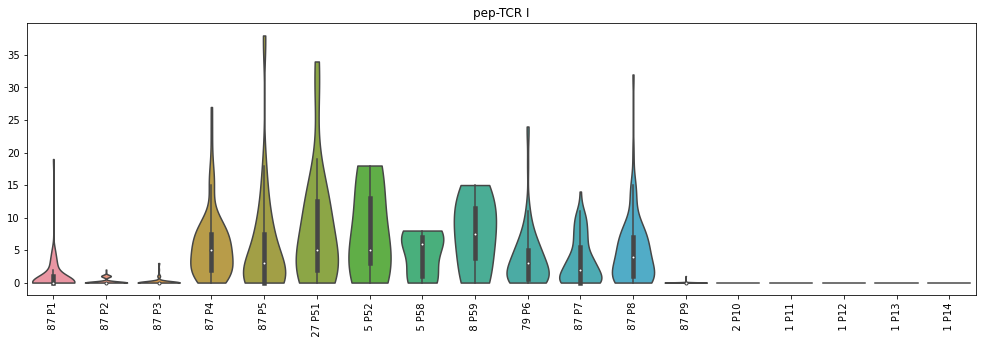

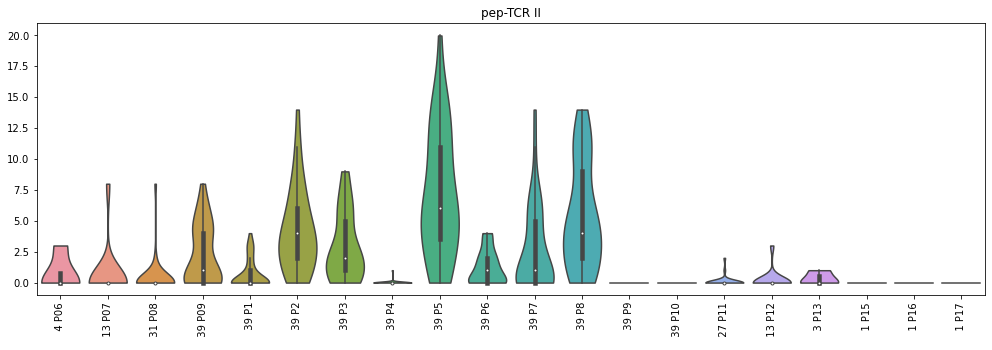

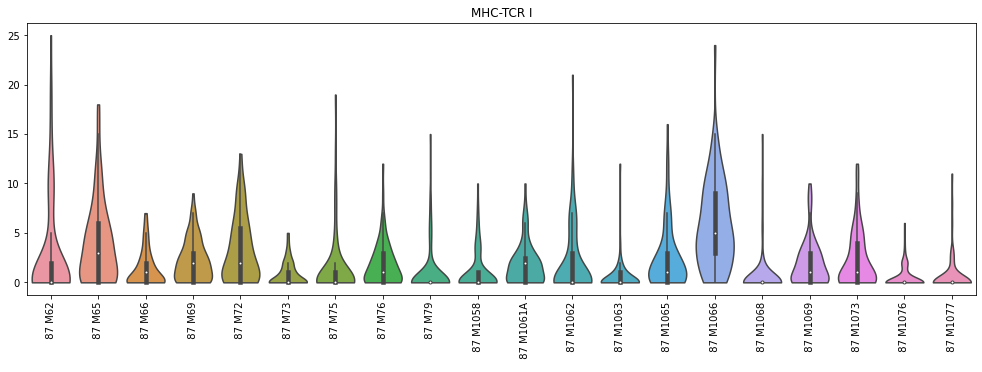

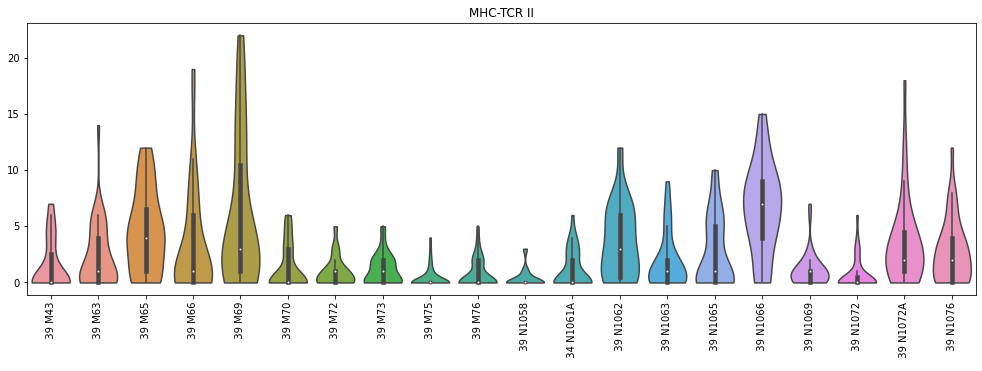

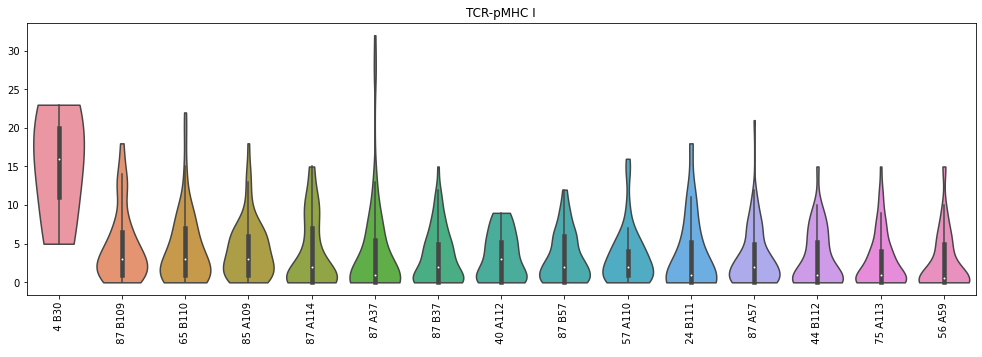

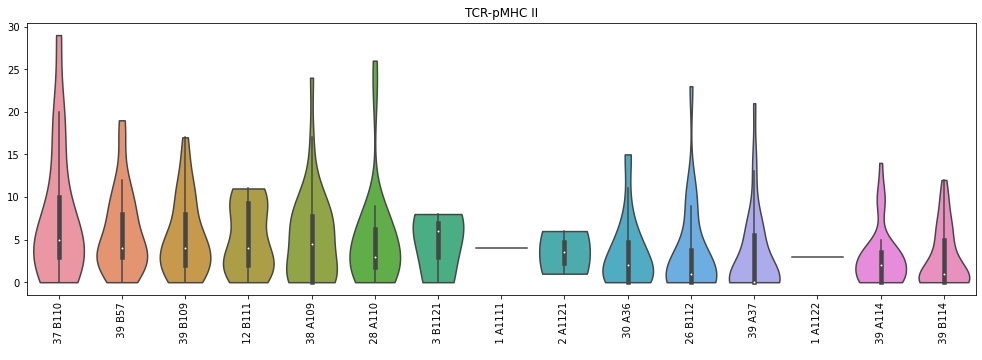

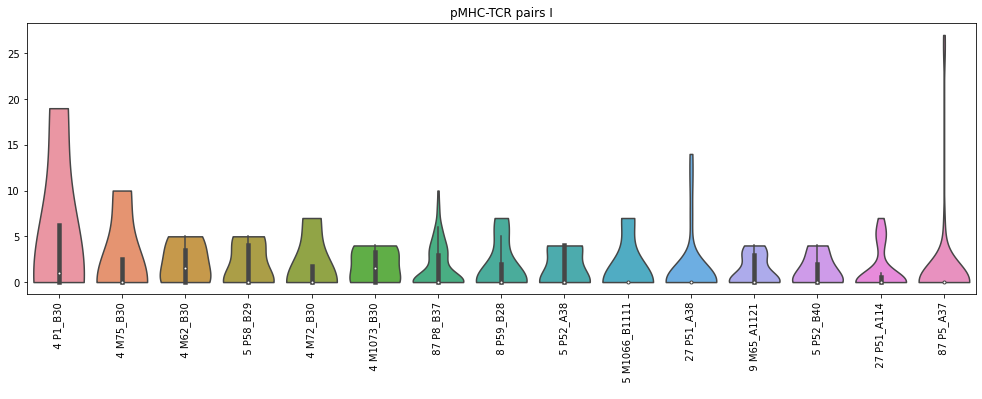

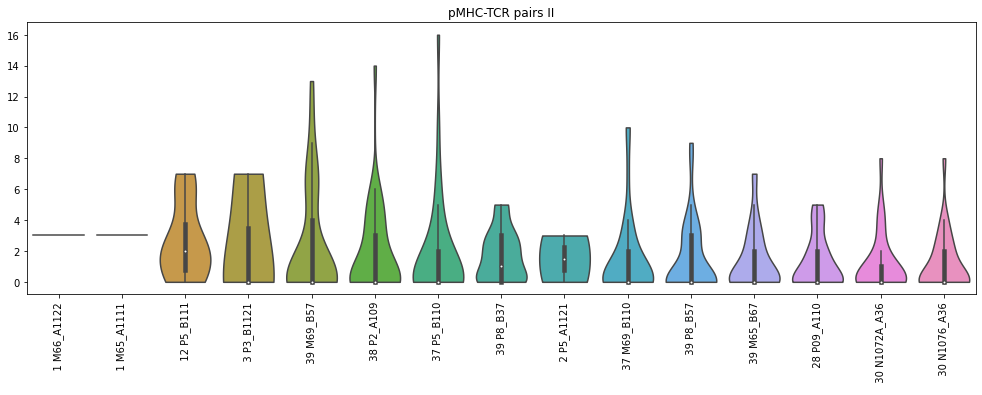

completed in   6.8 s


In [12]:
#plot pmhc-tcr contacts
t0=time.time()
with open(output_dir+'/contact_maps_pmhc-tcr.pckl','rb') as f:
    d=pickle.load(f)
res_contacts1,res_contacts2,pair_contacts=d['res_contacts1'],d['res_contacts2'],d['pair_contacts']
#split pep and mhc in res_contacts1
res_contacts1_split={'I':{},'II':{}}
rechain={'P':'P','M':'M','N':'M'}
for cl,v in res_contacts1.items():
    for k,w in v.items():
        res_contacts1_split[cl].setdefault(rechain[k[0]],{}).update({k:w})
figsize=(17,5)
dict_to_violin(res_contacts1_split['I']['P'],20,'pep-TCR I',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts1_split['II']['P'],20,'pep-TCR II',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts1_split['I']['M'],20,'MHC-TCR I',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts1_split['II']['M'],20,'MHC-TCR II',sort_by_resname=True,figsize=figsize)
dict_to_violin(res_contacts2['I'],15,'TCR-pMHC I',sort_by_resname=False,figsize=figsize)
dict_to_violin(res_contacts2['II'],15,'TCR-pMHC II',sort_by_resname=False,figsize=figsize)
dict_to_violin(pair_contacts['I'],15,'pMHC-TCR pairs I',sort_by_resname=False,figsize=figsize)
dict_to_violin(pair_contacts['II'],15,'pMHC-TCR pairs II',sort_by_resname=False,figsize=figsize)
print('completed in {:5.1f} s'.format(time.time()-t0))      

In [14]:
pep_coords_all['II'].keys()

dict_keys(['   08', '   09', '   1 ', '   2 ', '   3 ', '   4 ', '   5 ', '   6 ', '   7 ', '   8 ', '   9 ', '  10 ', '  11 ', '  12 '])

In [15]:
res_contacts1_split['II']['P'].keys()

dict_keys(['P   07', 'P   08', 'P   09', 'P   1 ', 'P   2 ', 'P   3 ', 'P   4 ', 'P   5 ', 'P   6 ', 'P   7 ', 'P   8 ', 'P   9 ', 'P  10 ', 'P  11 ', 'P  12 ', 'P   06', 'P  13 ', 'P  14 ', 'P  15 ', 'P  16 ', 'P  17 ', 'P  18 ', 'P  19 '])

In [29]:
#plotting functions
    
def dict_to_violin1(d,reslist):
    d_new={k:d[k] for k in reslist}
    ls={k:len(d_new[k]) for k in d_new}
    l_max=max(list(ls.values()))
    d_new={k: v+[np.nan]*(l_max-ls[k]) for k,v in d_new.items()} #normalize len for pandas
    df=pd.DataFrame(d_new)
    sns.violinplot(data=df,cut=0,scale='width')
    plt.xticks(range(len(reslist)),reslist)#,rotation=90)

In [21]:
def f_coord(k):
    if k[-1]==' ':
        return '{:2d}'.format(int(k[:-1]))
    else:
        return '{:2d}.{}'.format(int(k[:-1]),k[-1])
d_coords={f_coord(k):v for k,v in pep_coords_all['II'].items()}

with open(output_dir+'/contact_maps_pep-mhc.pckl','rb') as f:
    d=pickle.load(f)
res_contacts1,res_contacts2,pair_contacts=d['res_contacts1'],d['res_contacts2'],d['pair_contacts']
d_pepmhc={f_coord(k[1:]):v for k,v in res_contacts1['II'].items()}

with open(output_dir+'/contact_maps_pmhc-tcr.pckl','rb') as f:
    d=pickle.load(f)
res_contacts1,res_contacts2,pair_contacts=d['res_contacts1'],d['res_contacts2'],d['pair_contacts']
#split pep and mhc in res_contacts1
res_contacts1_split={'I':{},'II':{}}
rechain={'P':'P','M':'M','N':'M'}
for cl,v in res_contacts1.items():
    for k,w in v.items():
        res_contacts1_split[cl].setdefault(rechain[k[0]],{}).update({k:w})
d_peptcr={f_coord(k[1:]):v for k,v in res_contacts1_split['II']['P'].items()}

In [25]:
d_coords.keys()

dict_keys([' 0.8', ' 0.9', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', '10', '11', '12'])

In [26]:
reslist=[' 0.8', ' 0.9', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', '10', '11', '12']

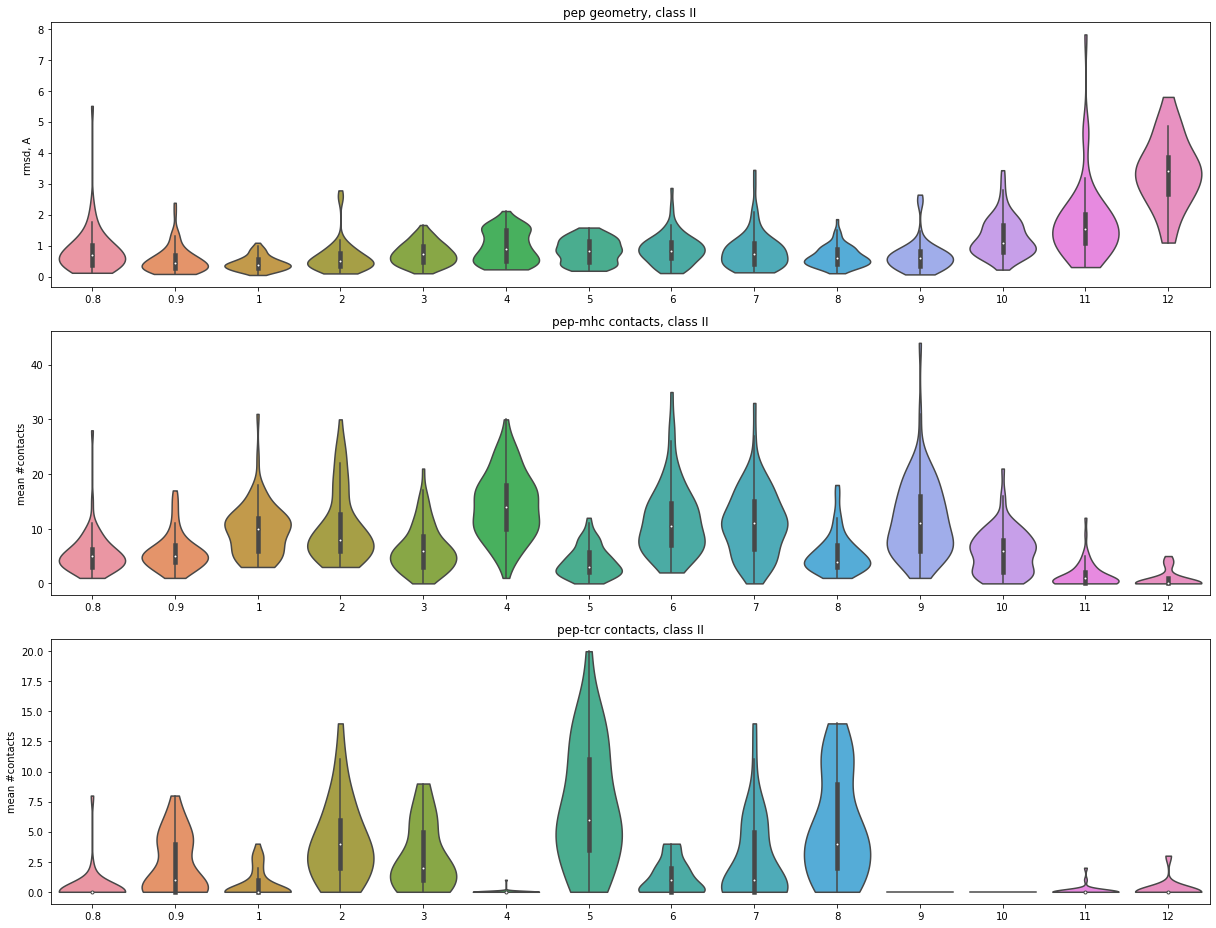

In [32]:
plt.figure(figsize=(17,13))
plt.subplot(311)
dict_to_violin1(d_coords,reslist)
plt.ylabel('rmsd, A')
plt.title('pep geometry, class II')
plt.subplot(312)
dict_to_violin1(d_pepmhc,reslist)
plt.ylabel('mean #contacts')
plt.title('pep-mhc contacts, class II')
plt.subplot(313)
dict_to_violin1(d_peptcr,reslist)
plt.title('pep-tcr contacts, class II')
plt.ylabel('mean #contacts')
plt.tight_layout()
plt.show()

# look at linkers in cl 2

In [18]:
pmhcs2=[x for x in pmhcs if x['M']['info']['class']=='II']
print(len(pmhcs2))

128


In [19]:
linker_info=[int(np.any(x['P']['info']['linker'])) for x in pmhcs2]
print(len(linker_info),np.sum(linker_info))
#cl 1: 13 of 768
#cl 2: 30 of 128

128 30


# look at ATLAS data

In [21]:
with open('../TCR_pMHC_prediction_2.1/data/ATLAS/assays_str.pckl','rb') as f:
    assays=pickle.load(f)
print(len(assays))
print(assays[0])

633
['FLRGRAYGL', ['GSHSMRYFDTAMSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIFKTNTQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARVAEQDRAYLEGTCVEWLRRYLENGKDTLERA', None], ['DAKTTQPNSMESNEEEPVHLPCNHSTISGTDYIHWYRQLPSQGPEYVIHGLTSNVNNRMASLAIAEDRKSSTLILHRATLRDAAVYYCILPLAGGTSYGKLTFGQGTILTVHP', 'GAGVSQSPRYKVAKRGQDVALRCDPISGHVSLFWYQQALGQGPEFLTYFQNEAQLDKSGLPSDRFFAERPEGSVSTLKIQRTQQEDSAVYLCASSLGQAYEQYFGPGTRLTVT'], '12500.0']


In [15]:
from tfold.utils import seq_tools
seq_tools.load_mhcs()
seq_tools.load_tcrs()

MHC loading from MHC.pckl. To update the pickle file, set use_pickle to False
loaded 26122 MHC sequences in  4.4 s
TCR loading from TCR.pckl. To update the pickle file, set use_pickle to False
loaded 2835 TCR sequences in  0.2 s


In [63]:
atlas_df=pd.read_excel('../TCR_pMHC_prediction_2.1/data/ATLAS/ATLAS.xlsx',dtype=str,keep_default_na=False,na_values=[])
print(atlas_df.columns)
print(len(atlas_df))

Index(['Index', 'TCRname', 'MHCname', 'MHCname_PDB', 'MHC_mut',
       'MHC_mut_chain', 'TCR_mut', 'Kd_microM', 'Kon_per_M_per_s',
       'Koff_per_s', 'Kd_wt/Kd_mut', 'DeltaG_kcal_per_mol',
       'Delta_DeltaG_kcal_per_mol', 'Temperature_K', 'PEPseq', 'PEP_mut',
       'true_PDB', 'Structure_Method', 'Resolution', 'R-value', 'R-free',
       'template_PDB', 'pMHC_PBID', 'TCR_mut_chain', 'CDR', 'wtCDRseq',
       'TCR_PDB_chain', 'PMID', 'Exp. Method', 'SPR SensorChip',
       'Immobilized Ligand', 'Coupling Method', 'Analyte'],
      dtype='object')
694


In [64]:
#convert to numeric
def _kd_to_num(x):
    d={}
    if x=='n.d.':
        for k in ['sign','value','error']:
            d[k]=None
        return d
    if x.startswith(('>','<')):
        d['sign']=x[0]
        x=x[1:]
    else:
        d['sign']='='
    if '+/-' in x:
        d['value'],d['error']=x.split('+/-')
        d['value'],d['error']=float(d['value']),float(d['error'])
    else:
        d['value']=float(x)
        d['error']=None
    return d
x=atlas_df['Kd_microM'].map(_kd_to_num)
x=pd.DataFrame(x.to_list())
atlas_df[['kd_sign','kd_value','kd_error']]=x
atlas_df=atlas_df.drop('Kd_microM',axis=1)
atlas_df['DeltaG_kcal_per_mol']=pd.to_numeric(atlas_df['DeltaG_kcal_per_mol'],errors='coerce')
atlas_df['Temperature_K']=pd.to_numeric(atlas_df['Temperature_K'])
atlas_df['Kd_wt/Kd_mut']=pd.to_numeric(atlas_df['Kd_wt/Kd_mut'],errors='coerce')

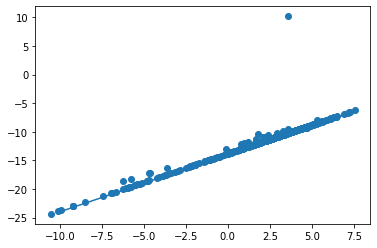

In [88]:
plt.figure()
plt.scatter(np.log(atlas_df['kd_value'].values),atlas_df['DeltaG_kcal_per_mol'].values*503.228/atlas_df['Temperature_K'].values)
x=np.arange(-10,8)
plt.plot(x,(x-14))
plt.show()

In [ ]:
atlas_df['DeltaG_kcal_per_mol']

In [66]:
df_kd=atlas_df[~atlas_df['kd_value'].isna()]
print(len(df_kd),len(atlas_df))

637 694


In [67]:
df_kd['true_PDB'].value_counts()

        525
1AO7      8
2AK4      5
2BNR      4
3HG1      4
       ... 
3UTT      1
4JFE      1
4JFD      1
4JFF      1
2OI9      1
Name: true_PDB, Length: 85, dtype: int64

In [68]:
df_kd['template_PDB'].value_counts()

1AO7    181
         93
2AK4     44
1MI5     44
3QIB     24
2BNR     24
4MNQ     22
2VLJ     22
1BD2     19
3QDG     18
3QDJ     17
4GG6     13
4OZG     12
3MV7     11
3PL6      9
2F54      8
4L3E      6
3GSN      6
3O6F      6
4JRY      6
4JFF      6
3O4L      5
3FFC      4
1G6R      3
4PRI      3
4QRP      3
2ESV      3
3VXR      2
3DXA      2
3HG1      2
1FYT      2
3PWP      2
3KPS      2
3KPR      2
3QIU      2
2OL3      1
3VXM      1
4G8G      1
4JRX      1
4H1L      1
3VXU      1
3UTT      1
3H9S      1
4P23      1
Name: template_PDB, dtype: int64

In [69]:
df_kd[df_kd['true_PDB']=='1AO7']

,Index,TCRname,MHCname,MHCname_PDB,MHC_mut,MHC_mut_chain,TCR_mut,Kon_per_M_per_s,Koff_per_s,Kd_wt/Kd_mut,...,TCR_PDB_chain,PMID,Exp. Method,SPR SensorChip,Immobilized Ligand,Coupling Method,Analyte,kd_sign,kd_value,kd_error
62,63,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,51100,0.108,1.0,...,\N,18767161,Biacore 3000,CM5,A6 WT,direct,LLFGYPVYV-HLA-A*02:01,=,2.113503,NaN
119,120,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,110000,0.093,1.0,...,\N,10435578,Biacore 1000,CM5,A6 WT,direct,LLFGYPVYV-HLA-A*02:01,=,0.910000,0.09
132,133,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,45800,0.11,1.0,...,\N,16962135,Biacore 3000,CM5,A6 WT,direct,LLFGYPVYV-HLA-A*02:01,=,2.400000,NaN
137,138,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,\N,\N,1.0,...,\N,20064447,Biacore 3000,CM5,A6 WT,direct,LLFGYPVYV,=,1.800000,0.10
180,181,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,\N,\N,1.0,...,\N,22019736,Time-resolved fluorescence anisotropy,\N,\N,\N,\N,=,0.900000,0.10
240,241,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,23000,0.074,1.0,...,\N,23805144,Biacore 3000,CM5,LLFGYPVYV-HLA-A*02:01,indirect,A6 WT,=,3.200000,NaN
247,248,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,110000,0.093,1.0,...,\N,11238586,Biacore 1000,CM5,A6 WT,direct,LLFGYPVYV-HLA-A*02:01,=,0.910000,0.09
254,255,A6,HLA-A*02:01,HLA-A*02:01,WT,nan,WT,51000,0.108,1.0,...,\N,20681514,Biacore 3000,CM5,A6 WT,direct,LLFGYPVYV-HLA-A*02:01,=,2.100000,0.35


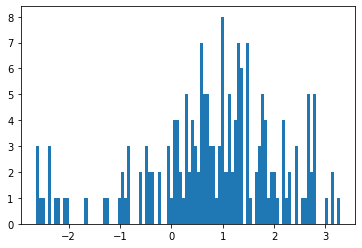

In [70]:
x=df_kd[df_kd['template_PDB']=='1AO7']
plt.figure()
plt.hist(np.log10(x['kd_value'].values),bins=100)
plt.show()

507 694


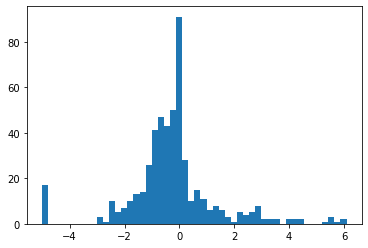

In [75]:
x=atlas_df[~atlas_df['Kd_wt/Kd_mut'].isna()]
print(len(x),len(atlas_df))
y=x['Kd_wt/Kd_mut'].values
y=y+(y==0)*(1e-5) #regularize
plt.figure()
plt.hist(np.log10(y),bins=50)
plt.show()

In [76]:
np.sum(y==1)

39

# HLA-DRB1 vs CDR3, Raychaudhuri NatGen

In [4]:
from tfold.utils import seq_tools
seq_tools.load_mhcs()
seq_tools.load_tcrs()

import tfold.nn.nn_predict

MHC loading from MHC.pckl. To update the pickle file, set use_pickle to False
loaded 26122 MHC sequences in  2.4 s
TCR loading from TCR.pckl. To update the pickle file, set use_pickle to False
loaded 2835 TCR sequences in  0.2 s


In [16]:
#position 13?

#collect DRB1
drb={}
for k,v in seq_tools.mhcs.items():
    if k[0]=='9606' and k[1]=='DRB1':
        drb[k[2]]=v
print(len(drb))

#count aa's
aa_dict={}
for m in drb.values():
    for x in m.data:
        aa_dict.setdefault(x['pdbnum'],[]).append(x['seq'])
print(len(aa_dict))

def count_aa(x):
    x=np.array(x)
    x_u=np.unique(x)
    return {a:np.sum(x==a) for a in x_u}
aa_counts={k:count_aa(v) for k,v in aa_dict.items()}

2054
90


In [17]:
aa_counts
#pos 13 should be FGHRSY
#clearly, it is my pos 1009!!! And N1009-P4 is among top contact pairs!

#conclusion: their position 13 is certainly my pos N1009

{'1001 ': {'P': 209},
 '1002 ': {'C': 8, 'G': 3, 'H': 2, 'L': 2, 'P': 1, 'R': 2024, 'S': 4},
 '1003 ': {'F': 2046, 'L': 2, 'V': 1},
 '1004 ': {'L': 2051, 'P': 1},
 '1005 ': {'D': 1, 'E': 1525, 'G': 1, 'K': 46, 'Q': 4, 'R': 2, 'W': 475},
 '1006 ': {'C': 1,
  'D': 1,
  'E': 42,
  'L': 10,
  'N': 1,
  'P': 1,
  'Q': 833,
  'R': 1,
  'S': 1,
  'Y': 1163},
 '1007 ': {'A': 3,
  'C': 2,
  'D': 47,
  'F': 1,
  'G': 119,
  'I': 2,
  'L': 126,
  'P': 240,
  'R': 2,
  'S': 1163,
  'V': 349},
 '1008 ': {'A': 1,
  'E': 1,
  'K': 883,
  'M': 3,
  'N': 2,
  'P': 1,
  'R': 2,
  'T': 1161},
 '1009 ': {'C': 3,
  'D': 1,
  'F': 207,
  'G': 232,
  'H': 305,
  'K': 2,
  'P': 4,
  'Q': 1,
  'R': 238,
  'S': 941,
  'Y': 120},
 '1010 ': {'E': 1930, 'K': 122, 'Q': 2},
 '1011 ': {'C': 2045, 'G': 1, 'R': 1, 'S': 1, 'W': 2, 'Y': 4},
 '1012 ': {'H': 1797, 'N': 2, 'Q': 22, 'R': 4, 'Y': 229},
 '1013 ': {'F': 2049, 'L': 3, 'S': 1, 'V': 1},
 '1014 ': {'F': 2051, 'L': 1, 'S': 1, 'V': 1},
 '1015 ': {'D': 2, 'I': 1, 'K':

In [ ]:
#look at tfold regerr for DRB1
df=pmhcs_df[pmhcs_df['class']=='II']
df=nn_predict.predict(df,'II',mhc_as_obj=True,
                      model_list=model_list,params_dir=params_dir,weights_dir=weights_dir,
                      keep_all_predictions=False)

In [35]:
pmhcs_df=pd.read_pickle('./data/experimental_structures/processed_updated/pmhcs_df.pckl')
print(len(pmhcs_df))
print(pmhcs_df.columns)
pmhcs_df=pmhcs_df[pmhcs_df['class']=='II'] #restrict to cl 2
pmhcs_df=pmhcs_df.groupby('cluster_seq').apply(lambda x:x[:1]).reset_index(drop=True) #one per seq cluster
#restrict to DRB1
pmhcs_df=pmhcs_df[pmhcs_df['mhc_b_allele'].map(lambda x:(x[0]=='9606') and (x[1]=='DRB1'))]
pmhcs_df=pmhcs_df[pmhcs_df['pep'].map(lambda x: x.count('X')<=2)] #drop peptides with too many Xs

print(len(pmhcs_df))

928
Index(['id', 'class', 'cluster_seq', 'cluster_CA', 'date', 'pep', 'tails',
       'linker', 'mhc_a_allele', 'mhc_b_allele', 'netmhc_core', 'netmhc_kd',
       'netmhc_tails'],
      dtype='object')
39


In [36]:
np.sum(pmhcs_df['netmhc_tails']!=pmhcs_df['tails']) #count regerr
#9 out of 39! not great...

9

115836
Index(['pep', 'mhc_a', 'mhc_b', 'kd'], dtype='object')
assays with human DRB1: 61353


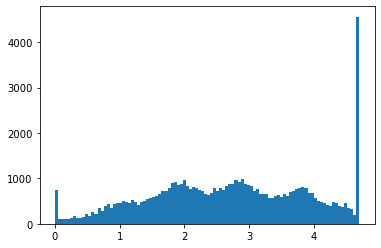

DRB1 binders: 19143
making Kd predictions for 19143 pmhcs...


2022-08-19 21:30:08.737802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/vmikhayl/anaconda3/envs/bio-p310/lib/python3.10/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['regmask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


In [7]:
#load pmhc assays, predict tails with seqnn
with open('./data/pmhc_assays/train_ii.pckl','rb') as f:
    assays=pickle.load(f)
print(len(assays))
print(assays.columns)

#restrict to DRB1
assays=assays[assays['mhc_b'].map(lambda x:(x[0]=='9606') and (x[1]=='DRB1'))]
print('assays with human DRB1:',len(assays))

plt.figure()
plt.hist(np.log10(assays['kd']),bins=100)
plt.show()

assays=assays[assays['kd']<100] #restrict to really good binders
print('DRB1 binders:',len(assays))

#predict tails
assays=tfold.nn.nn_predict.predict(assays,'II')

In [8]:
def get_pep_core(x):
    pep=x['pep']
    tails=x['seqnn_tails']
    if tails[0]>=0 and tails[1]>=0: #drop peps with incomplete cores
        return pep[tails[0]:len(pep)-tails[1]]
    else:
        return ''
    
assays['seqnn_pep_core']=assays.apply(get_pep_core,axis=1)
print('cores of len<9:',np.sum(assays['seqnn_pep_core'].map(len)==0)) #none

#add N1009 residue
aa_N1009={}
for x in assays['mhc_b'].unique():
    aa_N1009[x]=seq_tools.mhcs[x].get_residues_by_pdbnums(['1009 '])[0]
assays['aa_N1009']=assays['mhc_b'].map(aa_N1009)

#residue to pep cores
core_dict={}
for x in assays['aa_N1009'].unique():
    core_dict[x]=assays[assays['aa_N1009']==x]['seqnn_pep_core'].values
for k,v in core_dict.items():
    print(k,len(v))

cores of len<9: 0
F 6094
S 4350
H 3533
Y 2030
G 1462
R 1674


In [9]:
#save
with open('./tmp/drb1_n1009_cores.pckl','wb') as f:
    pickle.dump(core_dict,f)

In [10]:
#load
with open('./tmp/drb1_n1009_cores.pckl','rb') as f:
    core_dict=pickle.load(f)

In [69]:
#DOESN'T WORK (generates defective png files)
from Bio import motifs
from Bio.Seq import Seq
motifs_dict={}
for k,v in core_dict.items():
    instances=[Seq(x) for x in v]
    motifs_dict[k]=motifs.create(instances,alphabet='ACDEFGHIKLMNPQRSTVWY')
for k,m in motifs_dict.items():
    m.weblogo(f'/home/vmikhayl/exchange/DRB1_motifs/{k}.png')

In [11]:
import weblogo

In [13]:
for k,v in core_dict.items():
    v=np.random.permutation(v)
    x=weblogo.seq.SeqList(list(v),alphabet=weblogo.Alphabet('ACDEFGHIKLMNPQRSTVWY'))
    logodata=weblogo.LogoData.from_seqs(x)
    logooptions=weblogo.LogoOptions(yaxis_scale=2,resolution=512)
    logooptions.title=k
    logoformat=weblogo.LogoFormat(logodata, logooptions)
    y=weblogo.png_formatter(logodata, logoformat)
    with open(f'./tmp/drb1_logos/{k}.png','wb') as f:
        f.write(y)

In [41]:
#help(weblogo.LogoOptions)
#help(weblogo.png_formatter)
#help(weblogo.logo.LogoFormat)

In [47]:
for a in ['04:01','04:04']:
    print(a,seq_tools.mhcs['9606','DRB1',a].get_residues_by_pdbnums(['1009 '])[0])
#both have H

04:01 H
04:04 H


In [12]:
#look at structures of complexes
source_dir='./data/experimental_structures/processed_updated'
with open(source_dir+'/complexes.pckl','rb') as f:
    complexes=pickle.load(f)
print(len(complexes))
print(complexes[0].keys())

with open(source_dir+'/summary.pckl','rb') as f:
    summary=pickle.load(f)
print(len(summary))

247
dict_keys(['P', 'M', 'A', 'B', 'pmhc_id', 'tcr_A_id', 'tcr_B_id', 'pdbs', 'date', 'class', 'id', 'pmhc_cluster_seq', 'tcr_A_cluster_seq', 'tcr_B_cluster_seq', 'complex_cluster_seq'])
2382


In [4]:
complexes_drb1=[c for c in complexes if ('N' in c) and (c['N']['info']['species']=='9606') and (c['N']['info']['locus']=='DRB1')]
print(len(complexes_drb1))

18


In [16]:
ls=[]
for c in complexes_drb1:
    x=seq_tools.load_NUMSEQ(c['B'])
    cdr3=x.get_fragment_by_pdbnum(' 104 ',' 118 ')
    y=seq_tools.load_NUMSEQ(c['N'])
    ls.append([c['id'],','.join([a[0] for a in c['pdbs']]),len(cdr3.seq()),x.get_residues_by_pdbnums([' 109 '])[0],y.info['allele'],y.get_residues_by_pdbnums(['1009 '])[0],cdr3.seq(),x.info['V']])
cdr_ls=[a[2] for a in ls]
ls=[ls[i] for i in np.argsort(cdr_ls)]
for l in ls:
    print('{:3d} {:30s} {:2d} {:1s} {:5s} {:1s} {:16s} {:13s}'.format(*l))    
    
#paper: strongest association of N1009 was w. cdr3 of len 13 pos 109

#there is 1 complex w cdr3 of len 13, and 5 with len 14

#all D's in cdr3 that go with H in N1009 are from TRBV4*02
#then their conclusions are a bit suspicious... Res 109 and 110 can easily be from the V gene,
#and I shouldn't trust their way of excluding this unless I really understand how they do it

 73 2ian_0,2ian_1,2ian_2,2ian_3    11 H 01:01 F CASTYHGTGYF      TRBV6-6*01   
153 2iam_0                         11 H 01:01 F CASTYHGTGYF      TRBV6-6*01   
243 4e41_0,4e41_1                  12 I 01:01 F CASSQIRETQYF     TRBV5-8*01   
175 4c56_0,4c56_1                  13 R 01:01 F CASSSRSSYEQYF    TRBV19*01    
209 1j8h_0                         14 T 04:01 H CASSSTGLPYGYTF   TRBV28*01    
193 3o6f_1,3o6f_0,3t0e_0           14 G 04:01 H CSARGGSYNSPLHF   TRBV20-1*01  
 56 1fyt_0                         14 T 01:01 F CASSSTGLPYGYTF   TRBV28*01    
 64 6v13_0                         14 D 04:01 H CASSLDWGVNTLYF   TRBV4*02     
176 6v15_0                         14 D 04:01 H CASSLDWGVNTLYF   TRBV4*02     
198 6cql_0                         15 L 11:01 S CASSRLAGGMDEQFF  TRBV2*01     
  7 6v18_0                         15 D 04:01 H CASSLDWGGQNTLYF  TRBV4*02     
223 6cqq_0,6cqq_1                  15 L 15:02 R CASSRLAGGMDEQFF  TRBV2*01     
 90 6cqr_0,6cqr_1                  15 L 01:01 F CASS

In [47]:
pdb_id='3o6f_1'#'1j8h_0' #'6v13_0'#'4c56_0'

with open(source_dir+f'/contact_maps/{pdb_id}.pckl','rb') as f:
    cmap=pickle.load(f)
cmap_keys=list(cmap.keys())
for k in cmap_keys:
    cmap[k[1],k[0]]=cmap[k] #symmetrize
def _restrict_to_res(cmap,pdbnum):
    d={}
    for k,v in cmap.items():
        if (pdbnum in k) and v!=0:
            d[k]=v
    return d
r='B 112 '
print(_restrict_to_res(cmap['B','P'],r))
print(_restrict_to_res(cmap['B','M'],r))
print(_restrict_to_res(cmap['B','N'],r))

#4c56_0: B109: no contacts
#6v13_0: B109: N1066=3;            B110: P5=2, M66=5, M70=3
#1j8h_0: B109: P3=1, M69=1, M70=1; B110: P6=1, P8=4, M73=1
#3o6f_1: B109: P6=1, M73=2;        B110: P6=1, M69=1, M70=2

#it increasingly looks like they picked res 109-110 because they are on the boundary of germline,
#so that their method of filtering out germline failed on them, but the signal comes entirely from V

#don't see much of a conserved contact geometry for B109 or B110
#it's true though that B110 may contact P5-P6, but how does the pocket for P4 affect that for a clII, which is rigid??

{('P   3 ', 'B 112 '): 3}
{('M  62 ', 'B 112 '): 1, ('M  66 ', 'B 112 '): 6, ('M  70 ', 'B 112 '): 1}
{}


In [19]:
#seq_tools.tcrs['9606','TRBV28','01'].seq()
seq_tools.tcrs['9606','TRBV20-1','01'].seq()

'GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYICSAR'

In [18]:
summary['3o6f_0']['B']['info']

{'species': '9606',
 'chain': 'B',
 'gaps': array([('G', 1, ' ', '   1 ', 'A', ''), ('A', 2, ' ', '   2 ', 'A', '')],
       dtype=[('seq', '<U3'), ('num', '<i2'), ('ins', '<U1'), ('pdbnum', '<U5'), ('ss', '<U15'), ('mutations', '<U3')]),
 'V': 'TRBV20-1*01',
 'J': 'TRBJ1-6*01',
 'hetero_res': {}}

In [20]:
#    1j8h_0                         14 T 04:01 H CASSSTGLPYGYTF   TRBV28*01    
#193 3o6f_1,3o6f_0,3t0e_0           14 G 04:01 H CSARGGSYNSPLHF   TRBV20-1*01  

In [22]:
len(seq_tools.mhcs['9606','DRA','01:01'].seq()),len(seq_tools.mhcs['9606','DRB1','04:01'].seq())

(84, 90)

# Figures and tables for the paper: dataset

In [10]:
print(pmhcs_df.columns)
pmhcs_df['class'].value_counts()

Index(['id', 'class', 'cluster_seq', 'cluster_CA', 'date', 'pep', 'tails',
       'linker', 'mhc_a_allele', 'mhc_b_allele', 'netmhc_core', 'netmhc_kd',
       'netmhc_tails'],
      dtype='object')


I     799
II    129
Name: class, dtype: int64

In [11]:
#species:
pmhcs_df['mhc_a_allele'].map(lambda x:x[0]).value_counts()
#10 species besides 9606 and 10090

9606     651
10090    207
9031      19
9823      18
9531       8
9796       7
9544       5
10116      5
9913       4
8022       2
9545       1
9541       1
Name: mhc_a_allele, dtype: int64

In [19]:
def _collect_pdbs(y):
    return tuple((z[0] for z in y))
pmhcs_df['pdbs']=pmhcs_df['id'].map(lambda x:_collect_pdbs(pmhcs[x]['pdbs']))

In [22]:
pmhcs_df.to_excel('./figures_and_tables/suppl_tab_1.xlsx')

In [3]:
# load filtered discovery dataset non-redundant structures
source_dir='./data/experimental_structures/processed_updated'

print('pmhcs seq clusters filtered')
with open(source_dir+'/pmhcs_seq_clusters_filtered.pckl','rb') as f:
    pmhcs_filtered=pickle.load(f) #seq clusters filtered
print(len(pmhcs_filtered))
print(pmhcs_filtered[0].keys())

#make dataframes
df=pd.DataFrame(pmhcs_filtered)
def _map_pep(x):    
    return ''.join(pmhcs[x]['P']['data']['seq'])
def _map_mhc_a(x):    
    return seq_tools.load_NUMSEQ(pmhcs[x]['M'])
def _map_mhc_b(x):    
    if 'N' in pmhcs[x]:
        return seq_tools.load_NUMSEQ(pmhcs[x]['N'])
    else:
        return None
df['pmhc_id']=df['pmhc_ids'].map(lambda x:x[0]) #keep id of the pmhc we model
df['pdb_id']=df['pmhc_id'].map(lambda x:pmhcs[x]['pdbs'][0][0])
df=df.drop(['pmhc_ids'],axis=1)
df=df.drop(['pdbs'],axis=1)
for k in ['class','tails','netmhc_tails','netmhc_kd']:
    df[k]=df['pmhc_id'].map(lambda x: pmhcs[x][k])
df['pep']=df['pmhc_id'].map(_map_pep)
df['mhc_a']=df['pmhc_id'].map(_map_mhc_a)
df['mhc_b']=df['pmhc_id'].map(_map_mhc_b)

#species statistics in the test set
print('test set species')
print('cl 1')
df_t=df[df['date']>=date_cutoff]
x=df_t[df_t['class']=='I']
print(x['mhc_a'].map(lambda a:a.info['species']).value_counts())
print('cl 2')
x=df_t[df_t['class']=='II']
print(x['mhc_a'].map(lambda a:a.info['species']).value_counts())

#ddiscovery test
df_d=df[df['date']<date_cutoff]
print('before cutoff:',len(df_d))
#tail statistics for cl 1
x=df_d[df_d['class']=='I']
print('cl 1:',len(x))
print('non trivial tails in cl 1:',np.sum(x['tails']!=(0,0)))
print('netmhc errors in cl 1:',np.sum(x['tails']!=x['netmhc_tails']))
x=df_d[df_d['class']=='II']
print('cl 2:',len(x))
print('netmhc errors in cl 2:',np.sum(x['tails']!=x['netmhc_tails']))

df_target=df_d
df_target=df_target.rename({'id':'cluster_seq'},axis=1) #that's what it is
df_target=df_target[df_target.columns[[4,0,3,2,1,5,6,7,8,9,10]]]
df_target=df_target.sort_values(['class','cluster_seq','pmhc_id','pdb_id'])
df_target=df_target.reset_index(drop=True)

#pdbs to exclude from templates: pdbs from the same seq cluster
#def _cluster_to_pdbs(x):
#    return list(set([a[0].split('_')[0] for a in pmhcs_seq_clusters[x]['pdbs']]))        
#df_target['exclude_pdbs']=df_target['cluster_seq'].map(_cluster_to_pdbs)

print(len(df_target))
print(df_target.columns)

pmhcs seq clusters filtered
444
dict_keys(['id', 'pmhc_ids', 'pdbs', 'date'])
test set species
cl 1
9606     72
9823      9
10090     9
9544      3
9031      3
9796      2
9545      1
8022      1
10116     1
Name: mhc_a, dtype: int64
cl 2
9606     9
10090    2
Name: mhc_a, dtype: int64
before cutoff: 332
cl 1: 270
non trivial tails in cl 1: 13
netmhc errors in cl 1: 9
cl 2: 62
netmhc errors in cl 2: 16
332
Index(['class', 'cluster_seq', 'pdb_id', 'pmhc_id', 'date', 'tails',
       'netmhc_tails', 'netmhc_kd', 'pep', 'mhc_a', 'mhc_b'],
      dtype='object')


In [12]:
#alleles statistics

def _mhc_to_str(x):
    s=[]
    for k in ['mhc_a','mhc_b']:
        y=x[k]
        if y:
            y=y.info
            s.append(str((y['species'],y['locus'],y['allele'])))
        else:
            s.append('')
    return '|'.join(s)

for x,name in zip([df_d,df_t],['discovery','test']):
    print(name)
    for cl in ['I','II']:
        y=x[x['class']==cl]
        print(cl,y.apply(_mhc_to_str,axis=1).nunique())
    print()
    

discovery
I 66
II 25

test
I 41
II 9



In [18]:
#registers for class I

#class I non-canonical
#non-redundant discovery
df1=df_d[df_d['class']=='I']
print('total:',len(df1),'non-canonical:',np.sum(df1['tails']!=(0,0)))
#all discovery
df1=pmhcs_df[pmhcs_df['date']<date_cutoff]
df1=df1[df1['class']=='I']
print('total:',len(df1),'non-canonical:',np.sum(df1['tails']!=(0,0)))
#print all non-canonical, with pep len
df2=df1[df1['tails']!=(0,0)].copy()
df2['peplen']=df2['pep'].map(len)
df2=df2.sort_values('peplen')
print(df2[df2['tails']==(-1,1)]) #exception
print(pmhcs[185]['pdbs'])
df2[['peplen','tails']]

total: 270 non-canonical: 13
total: 622 non-canonical: 32
      id class  cluster_seq  cluster_CA        date        pep    tails  \
161  185     I          153         131  2016-10-27  YQSGLSIVM  (-1, 1)   

     linker   mhc_a_allele mhc_b_allele netmhc_core    netmhc_kd netmhc_tails  \
161   False  (10090, K, d)         None   YQSGLSIVM  5675.539316       (0, 0)   

     peplen  
161       9  
[('5trz_0', {'pep_gaps': 0, 'linker': False, 'resolution': 2.25, 'includes_tcr': 0}), ('5trz_1', {'pep_gaps': 0, 'linker': False, 'resolution': 2.25, 'includes_tcr': 0})]


,peplen,tails
347,8,"(-1, 0)"
90,8,"(-1, 0)"
269,8,"(-1, 0)"
526,9,"(1, 0)"
424,9,"(0, 1)"
435,9,"(-1, 0)"
223,9,"(-1, 0)"
389,9,"(1, 0)"
105,9,"(1, 0)"
604,9,"(1, 0)"


In [12]:
13/270,32/622 #about 5%

(0.04814814814814815, 0.05144694533762058)

In [26]:
#registers for class II
df1=pmhcs_df[pmhcs_df['class']=='II'].copy()
df1['peplen']=df1['pep'].map(len)
print(len(df1))
deltas=(df1['peplen']-df1['tails'].map(lambda x:x[0])-df1['tails'].map(lambda x:x[1])-9).values
print(np.sum(deltas!=0))
#all are flat
print(pmhcs[248]['pdbs'])
df1[df1['tails'].map(lambda x:x[0]<0 or x[1]<0)]

129
0
[('4gbx_0', {'pep_gaps': 0, 'linker': False, 'resolution': 3.0, 'includes_tcr': 0})]


,id,class,cluster_seq,cluster_CA,date,pep,tails,linker,mhc_a_allele,mhc_b_allele,netmhc_core,netmhc_kd,netmhc_tails,peplen
32,248,II,189,426,2012-07-28,GKQNCLKLAT,"(-1, 2)",False,"(9606, DRA, 01:01)","(9606, DRB1, 01:01)",-KQNCLKLAT,22271.296069,"(1, 0)",10


In [35]:
#cl 1 tails
print(df_target[df_target['class']=='I']['tails'].map(lambda x:x[0]).value_counts())
print(df_target[df_target['class']=='I']['tails'].map(lambda x:x[1]).value_counts())

 0    263
 1      5
-1      2
Name: tails, dtype: int64
0    263
1      5
2      1
5      1
Name: tails, dtype: int64


In [4]:
#discovery: unfiltered register count
from tfold.nn import nn_utils
df=df_target[df_target['class']=='I']
reg_counts=df['pep'].map(len).map(nn_utils.generate_registers_I).map(len)
print('class I mean unfiltered registers:',reg_counts.mean())

df=df_target[df_target['class']=='II']
reg_counts=df['pep'].map(len).map(nn_utils.generate_registers_II).map(len)
print('class II mean unfiltered registers:',reg_counts.mean())

class I mean unfiltered registers: 4.2
class II mean unfiltered registers: 6.854838709677419


In [33]:
#filtered register counts

#read run_8 dataset run_8 (canonical at 2022-10-19) result
result_df=pd.read_pickle('/scratch/vmikhayl/pmhc_modeling/discovery_dataset/run_8/result_df.pckl')
print(len(result_df),result_df.columns)
#doesn't include info on number of prefiltered registers :(
#read inputs then
inputs_all=[]
for x in os.listdir('/scratch/vmikhayl/pmhc_modeling/discovery_dataset/run_8/inputs'):
    with open(f'/scratch/vmikhayl/pmhc_modeling/discovery_dataset/run_8/inputs/{x}','rb') as f:
        inputs_all+=pickle.load(f)
print(len(inputs_all))
print(inputs_all[0].keys())

#count registers for inputs
id_to_regs={}
id_to_class={}
for x in inputs_all:
    id_to_regs.setdefault(x['target_id'],set()).add(x['registers'][0])
    id_to_class[x['target_id']]='I'*(len(x['sequences'])==2)+'II'*(len(x['sequences'])==3)
reg_counts={'I':[],'II':[]}
for k in id_to_class:
    reg_counts[id_to_class[k]].append(len(id_to_regs[k]))
for cl in ['I','II']:
    print(cl,np.mean(reg_counts[cl]))

2149 Index(['pmhc_id', 'model_id', 'n_reg', 'best_score', 'best_mhc_score',
       'register_identified', 'af_tails', 'pep_lddt', 'mhc_lddt', 'pep_CA',
       'pep_all', 'mhc_CA', 'mhc_all', 'class', 'pep', 'mhc_a', 'mhc_b',
       'tails', 'netmhc_tails', 'af_n_reg', 'seqnn_logkd'],
      dtype='object')
2149
dict_keys(['sequences', 'msas', 'template_hits', 'renumber_list', 'target_id', 'current_id', 'registers', 'best_mhc_score', 'best_score', 'true_pdb'])
I 1.1777777777777778
II 4.225806451612903


In [32]:
regerr_ids=df_target[df_target['tails']!=df_target['netmhc_tails']]['pmhc_id'].values
pmhcs_df[pmhcs_df['id'].isin(regerr_ids)]

,id,class,cluster_seq,cluster_CA,date,pep,tails,linker,mhc_a_allele,mhc_b_allele,netmhc_core,netmhc_kd,netmhc_tails,pdbs
52,56,I,55,50,2016-09-02,TSTTSVASSW,"(1, 0)",False,"(9606, B, 57:01)",None,TS-TSVASSW,38.622659,"(0, 0)","(5t6x_0,)"
146,168,I,139,119,2011-04-09,WIYVYRPMGCGGS,"(0, 5)",False,"(10090, K, b)",None,WIYVYRP----GS,17298.205291,"(0, 0)","(3rgv_0,)"
161,185,I,153,131,2016-10-27,YQSGLSIVM,"(-1, 1)",False,"(10090, K, d)",None,YQSGLSIVM,5675.539316,"(0, 0)","(5trz_0, 5trz_1)"
216,245,I,186,159,2012-07-16,IDWFDGKD,"(0, 0)",False,"(9031, BF2, 004:01)",None,IDWFDGKD-,42509.446897,"(0, -1)","(4g42_0, 4g42_1)"
238,272,I,200,169,2017-03-14,TSTLQEQIGW,"(1, 0)",False,"(9606, B, 58:01)",None,TS-LQEQIGW,25.519468,"(0, 0)","(5v5l_0, 5v5l_1)"
338,389,I,261,220,2016-09-02,TSTLQEQIGW,"(1, 0)",False,"(9606, B, 57:01)",None,T-TLQEQIGW,56.342514,"(0, 0)","(5t6z_0, 5v5m_0, 5v5m_1)"
352,402,I,267,226,2016-09-01,SSTRGISQLW,"(1, 0)",False,"(9606, B, 57:01)",None,SS-RGISQLW,13.376519,"(0, 0)","(5t6w_0,)"
424,484,I,307,258,2017-10-22,AVKGVGTMV,"(0, 1)",False,"(9031, BF2, 012:01)",None,AVKGVGTMV,6639.604361,"(0, 0)","(5ymv_0, 5ymv_1)"
710,826,I,448,368,2016-09-02,TSTFEDVKILAF,"(1, 0)",False,"(9606, B, 57:01)",None,TST---VKILAF,5984.558126,"(0, 0)","(5t6y_0,)"
6,72,II,67,404,2001-09-26,HSRGGASQYRPSQRHGTGSGSG,"(3, 10)",False,"(10090, IAA, k)","(10090, IAB, u)",--------YRPSQRHGT-----,2600.637544,"(8, 5)","(1k2d_0,)"


In [20]:
#Bernoulli for regerr
import math
#cl II regerr discovery: 4 of 62, test: 3 of 11

f=4/62
for k in range(0,12): #prob of k errors
    print(k,math.comb(11,k)*(f**k)*((1-f)**(11-k)))

#prob of >=3 errors
p=0
for k in range(3,12): #prob of k errors
    p+=math.comb(11,k)*(f**k)*((1-f)**(11-k))
print('>=3:',p)

#i.e. regerr predicted <3 with 97% prob

0 0.4801747784981219
1 0.3642705216192649
2 0.1256105246962982
3 0.025988384419923766
4 0.003584604747575692
5 0.00034609976873144606
6 2.386894956768593e-05
7 1.1758103235313265e-06
8 4.0545183570045734e-08
9 9.320731855182926e-10
10 1.285618186921783e-11
11 8.060302112362276e-14
>=3: 0.02994417518631566


In [16]:
#cl II discovery and linkers:
#no regerr with linker: 17 without linker 41
#regerr with linker: 1 without linker 3

#(reg+ :reg correct, reg-: regerr)

#     | linker+  |  linker-
#reg+ |    17    |    41
#reg- |     1    |     3

10

In [ ]:
mhc_

# scheme for peptide alignment in templates

In [28]:
os.listdir('/scratch/vmikhayl/pmhc_modeling/discovery_dataset/run_10')

['result_df.pckl', 'inputs', 'target_df.pckl', 'logs', 'outputs']

In [48]:
#d='discovery_dataset/run_10'
d='test_dataset'
inputs_all=[]
for x in os.listdir(f'/scratch/vmikhayl/pmhc_modeling/{d}/inputs'):
    with open(f'/scratch/vmikhayl/pmhc_modeling/{d}/inputs/{x}','rb') as f:
        inputs_all+=pickle.load(f)
print(len(inputs_all))
print(inputs_all[0].keys())

test_df=pd.read_pickle(f'/scratch/vmikhayl/pmhc_modeling/{d}/result_df.pckl')
print(len(test_df),test_df.columns)

644
dict_keys(['sequences', 'msas', 'template_hits', 'renumber_list', 'target_id', 'current_id', 'registers', 'best_mhc_score', 'best_score', 'true_pdb'])
644 Index(['pmhc_id', 'model_id', 'n_reg', 'best_score', 'best_mhc_score',
       'register_identified', 'af_tails', 'pep_lddt', 'mhc_lddt', 'pep_CA',
       'pep_all', 'mhc_CA', 'mhc_all', 'class', 'pep', 'mhc_a', 'mhc_b',
       'tails', 'netmhc_tails', 'af_n_reg', 'seqnn_logkd'],
      dtype='object')


In [49]:
#DESCRIBE BOTH CL I and CL II!!!
test_df[(test_df['tails']!=(0,0))&(test_df['class']=='I')][['pep','tails','af_tails','pmhc_id']].head(50)

#RLPAKAPLLGCG

,pep,tails,af_tails,pmhc_id
485,RVEDVTNTAEYW,"(1, 1)","(0, 0)",623
577,RLPAKAPLLGCG,"(0, 3)","(0, 3)",601
640,RVEDVTNTAEYW,"(1, 0)","(0, 0)",592


In [43]:
x_a=[]
max_score=0
for x in inputs_all:
    s=x['template_hits'][0]['sum_probs']
    max_score=max(max_score,s)
    if s==997: #x['target_id']==511:
        x_a.append(x)
print(max_score)

997


In [44]:
for x in x_a:
    for t in x['template_hits']:
        print(t['name'],t['sum_probs'],t['hit_sequence'],t['query'])
    print()
    
#826
#TSTFEDVKILAF
#-RVAQLE-QVYI 
#-TSNLQE-QIGW
#-LALLT--GVRW
#-LTVQV--ARVW

1bx2_0 997 ENPVVHFFKNIVTP---------K-KEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR ENPVVHFFKNIVTPRGGSGGGGGKIKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR
6cpo_0 981 --RFYKTLRAEQASQ-----------EHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVGESFTVQRR ENPVVHFFKNIVTPRGGSGGGGGIKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR
4mdi_0 976 --SAVRLXSSVPGVR----------EEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLEQVKHECHFFNGTERVRFLDRYFYHQEEYVRFDSDVGEYRAVTELGRPDAEYWNSQKDILED

In [45]:
x_a[0]

{'sequences': ['ENPVVHFFKNIVTPRGGSGGGGG',
  'IKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITN',
  'PRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR'],
 'msas': [],
 'template_hits': [{'index': None,
   'name': '1bx2_0',
   'aligned_cols': 188,
   'sum_probs': 997,
   'query': 'ENPVVHFFKNIVTPRGGSGGGGGKIKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR',
   'hit_sequence': 'ENPVVHFFKNIVTP---------K-KEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRR',
   'indices_query': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,

In [38]:
test_df[test_df['class']=='II']

,pmhc_id,model_id,tpl_tails,best_score,best_mhc_score,register_identified,af_tails,pep_lddt,mhc_lddt,pep_CA,...,tails,netmhc_tails,netmhc_kd,pep,mhc_a,mhc_b,exclude_pdbs,tails_prefiltered,af_n_reg,seqnn_logkd
0,531,3,"(1, 10)",15,0,True,"(8, 3)","[[P 02, 33.13200457501807], [P 03, 45.1901...","[[M 61 , 90.61053759869625], [M 70 , 97.0130...",0.328734,...,"(8, 3)","(8, 3)",1716.946861,GSHSRGYEIAPVFVLLEYVT,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[1es0],"[(0, 11), (1, 10), (3, 8), (5, 6), (6, 5), (7,...",10,3.496364
1,531,25,"(10, 1)",19,0,True,"(10, 1)","[[P 0z, 29.950953170737183], [P 01, 37.150...","[[M 61 , 90.92718143224418], [M 70 , 97.1114...",6.505222,...,"(8, 3)","(8, 3)",1716.946861,GSHSRGYEIAPVFVLLEYVT,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[1es0],"[(0, 11), (1, 10), (3, 8), (5, 6), (6, 5), (7,...",10,4.700083
2,531,0,"(0, 11)",15,0,True,"(8, 3)","[[P 02, 37.72674597922741], [P 03, 37.5371...","[[M 61 , 91.1373978693433], [M 70 , 97.49763...",0.336537,...,"(8, 3)","(8, 3)",1716.946861,GSHSRGYEIAPVFVLLEYVT,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[1es0],"[(0, 11), (1, 10), (3, 8), (5, 6), (6, 5), (7,...",10,3.496364
3,531,29,"(11, 0)",40,23,False,"(11, 0)","[[P 0y, 26.73652927453804], [P 0z, 30.5226...","[[M 61 , 27.804341944812222], [M 70 , 27.637...",14.597065,...,"(8, 3)","(8, 3)",1716.946861,GSHSRGYEIAPVFVLLEYVT,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[1es0],"[(0, 11), (1, 10), (3, 8), (5, 6), (6, 5), (7,...",10,5.178332
4,531,1,"(0, 11)",18,1,True,"(0, 11)","[[P 1 , 66.48796047864013], [P 2 , 76.3459...","[[M 61 , 92.46278925646128], [M 70 , 95.2303...",23.126416,...,"(8, 3)","(8, 3)",1716.946861,GSHSRGYEIAPVFVLLEYVT,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[1es0],"[(0, 11), (1, 10), (3, 8), (5, 6), (6, 5), (7,...",10,5.189596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,641,0,"(2, 3)",8,1,True,"(2, 3)","[[P 08, 83.12977852601034], [P 09, 93.8694...","[[M 61 , 96.55687644082057], [M 70 , 98.5868...",0.374987,...,"(2, 3)","(2, 3)",643.782009,QAFWIDLFETIGGG,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,"[4p4r, 4p4k, 4p57]","[(2, 3)]",1,1.086569
2068,511,1,"(1, 2)",24,11,True,"(0, 3)","[[P 1 , 57.338819827733445], [P 2 , 62.621...","[[M 61 , 88.96085831456013], [M 70 , 95.7969...",1.302258,...,"(0, 3)","(3, 0)",5081.788146,KVTVAFNQFGGS,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[3wex],"[(0, 3), (1, 2), (2, 1), (3, 0)]",3,3.807675
2069,511,0,"(0, 3)",22,11,True,"(0, 3)","[[P 1 , 92.58505842701742], [P 2 , 94.6388...","[[M 61 , 93.92948389301101], [M 70 , 98.4508...",0.489785,...,"(0, 3)","(3, 0)",5081.788146,KVTVAFNQFGGS,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[3wex],"[(0, 3), (1, 2), (2, 1), (3, 0)]",3,3.807675
2070,511,2,"(2, 1)",25,11,False,"(2, 1)","[[P 08, 76.72218975139549], [P 09, 76.8173...","[[M 61 , 91.55767274405274], [M 70 , 93.9501...",4.247522,...,"(0, 3)","(3, 0)",5081.788146,KVTVAFNQFGGS,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,<tfold.utils.seq_tools.NUMSEQ object at 0x7f9b...,[3wex],"[(0, 3), (1, 2), (2, 1), (3, 0)]",3,5.501239


# trash

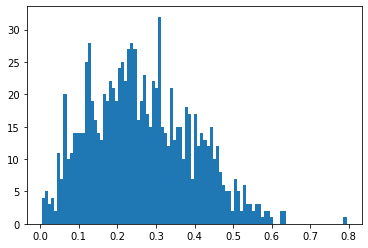

In [8]:
# AF training block deletion
N=1000
block_size=int(0.3*N)
#to_delete=[]
n_left=[]
for repeats in range(1000):
    ind_set=set(list(range(N)))
    for j in range(5):
        i0=np.random.randint(N)
        ind_set-=set(list(range(i0,i0+block_size)))
    n_left.append(len(ind_set)/N)
plt.figure()
plt.hist(n_left,bins=100)
plt.show()
#about 20% left!

In [2]:
n,N=500,1000
p,p2=(n+1)/(N+1),(n+1)*(n+2)/((N+2)*(N+3))
p,p2-p**2

(0.5004995004995005, -0.00025049775697932875)

In [4]:
os.listdir('./data/obj/seqnn')

['weights', 'params', 'model_list_I.pckl', 'model_list_II.pckl']

In [2]:
with open('./data/obj/seqnn/model_list_II.pckl','rb') as f:
    m=pickle.load(f)
print(m)

#run 7 (I) and run 11 (II)

# cl I (run 7):
#pep input 12+2
#mhc pseudoseq 26
#hidden 512+256+128

#cl II (run 11):
#mhc pseudoseq 30
#hidden 128*4
#tails 3+3

[(11,)]


In [9]:
import json

In [14]:
with open ('./data/obj/seqnn/params/run_11.json') as f:
    x=json.load(f)
print(len(x))
print(x[-1])

150
{'split_n': 4, 'cl': 'II', 'pep_mask': None, 'regmasks': ['2_4', 'none'], 'model': 'fully_connected', 'reduce_model': 'reduce_model_min', 'use_tails': True, 'n_hidden': [128, 128, 128, 128], 'actn': 'relu', 'dropout_rate': 0.0, 'batch_norm': True, 'epochs': [20, 5], 'batch_size': 32, 'inference_batch_size': 128, 'save_weights': True, 'save_image_losses': False, 'save_image_regerrors': False, 'run_n': 11, 'cpu_n': 7, 'output_dir': '/scratch/lustre/vmikhayl/tmp_pmhc_nn', 'model_n': 9, 'copy_n': 14}


In [2]:
print(np.log10(9200))
for i in range(5):
    x=np.random.rand()*50000
    print(x,np.log10(x))

3.963787827345555
26558.91785132982 4.424210375636851
5045.018223038206 3.7028627392846523
34963.6526274568 4.543616796762292
27684.5312105391 4.442237173887332
9106.498859702428 3.9593514375471472


In [3]:
from tfold.nn import pipeline

MHC loading from MHC.pckl. To update the pickle file, set use_pickle to False
loaded 26122 MHC sequences in  1.7 s


In [4]:
#x=pipeline.encode_mhc_i_allele(('9606','A','02:01'),26)
x=pipeline.encode_mhc_ii_allele(('9606','DQA1','05:01'),('9606','DQB1','02:01'),30)
print(x.shape)
aa=pipeline.aa_ext
print(''.join([aa[np.nonzero(a)[0][0]] for a in x]))

(30, 21)
NN-YVFRSFRHHFWHNVGYFALKISARLRE


In [18]:
[np.nonzero(a)[0] for a in x]

[array([19]),
 array([19]),
 array([18]),
 array([2]),
 array([8]),
 array([3]),
 array([18]),
 array([19]),
 array([16]),
 array([16]),
 array([19]),
 array([6]),
 array([13]),
 array([19]),
 array([8]),
 array([9]),
 array([17]),
 array([14]),
 array([19]),
 array([19]),
 array([5]),
 array([17]),
 array([4]),
 array([17]),
 array([10]),
 array([16])]

In [3]:
#count MHC alleles
alleles={}
for k in seq_tools.mhcs:
    if k[0]=='9606':
        alleles.setdefault(k[1],set())
        alleles[k[1]].add(seq_tools.mhcs[k].seq())
for k in np.sort(list(alleles.keys())):
    print(k,len(alleles[k]))

A 3489
B 4449
C 3229
DPA1 75
DPB1 873
DQA1 99
DQB1 867
DRA 1
DRB1 1833
DRB3 241
DRB4 104
DRB5 104
E 102
F 3
G 21


In [16]:
x=list(alleles['E'])
n=0
for a,b in zip(x[1],x[50]):
    print(a,b,'!'*(a!=b))
    n+=(a!=b)
print(n)

G G 
S S 
H H 
S S 
L L 
K K 
Y Y 
F F 
H H 
T T 
S S 
V V 
S S 
R R 
P P 
G G 
R R 
G G 
E E 
P P 
R R 
F F 
I I 
S S 
V V 
G G 
Y Y 
V V 
D D 
D D 
T T 
Q Q 
F F 
V V 
R R 
F F 
D D 
N N 
D D 
A A 
A A 
S S 
P P 
R R 
M M 
V V 
P P 
R R 
A A 
P P 
W W 
M M 
E E 
Q Q 
E E 
G G 
S S 
E E 
Y Y 
W W 
D D 
R R 
E E 
T T 
R R 
S S 
A A 
R R 
D D 
T T 
A A 
Q Q 
I I 
F F 
R R 
V V 
N N 
L L 
R R 
T T 
L L 
R R 
G G 
Y Y 
Y Y 
N N 
Q Q 
S S 
E E 
A A 
G G 
S S 
H H 
T T 
L L 
Q Q 
W W 
M M 
H H 
G G 
C C 
E E 
L L 
G G 
P P 
D D 
R G !
R R 
F F 
L L 
R R 
G G 
Y Y 
E E 
Q Q 
F F 
A A 
Y Y 
D D 
G G 
K K 
D D 
F Y !
L L 
T T 
L L 
N N 
E E 
D D 
L L 
R S !
S S 
W W 
T T 
A A 
V V 
D D 
T T 
A A 
A A 
Q Q 
I I 
S S 
E E 
Q Q 
K K 
S S 
N N 
D D 
A A 
S S 
E E 
A A 
E E 
H H 
Q Q 
R R 
A A 
Y Y 
L L 
E E 
D D 
T T 
C C 
V V 
E E 
W W 
L L 
H H 
K K 
Y Y 
L L 
E E 
K K 
G G 
K K 
E E 
T T 
L L 
L L 
H H 
L L 
3


In [2]:
#count tcr genes
seq_tools.load_tcrs()

TCR loading from TCR.pckl. To update the pickle file, set use_pickle to False
loaded 2835 TCR sequences in  0.2 s


In [19]:
loci={}
for k in seq_tools.tcrs:
    if k[0]=='9606':
        l=k[1]
        for x in ['TRAV','TRBV','TRAJ','TRBJ']:
            if x in l:
                loci.setdefault(x,[]).append(l)
                break
        else:
            loci.setdefault('none',[]).append(l)
for k in loci:
    print(k,len(np.unique(loci[k])))

TRAJ 51
TRAV 45
TRBJ 13
TRBV 48
none 18


In [17]:
for k i

['TRDJ1',
 'TRDJ2',
 'TRDJ3',
 'TRDJ4',
 'TRDV1',
 'TRDV2',
 'TRDV2',
 'TRDV2',
 'TRDV3',
 'TRDV3',
 'TRGJ1',
 'TRGJ1',
 'TRGJ2',
 'TRGJP',
 'TRGJP1',
 'TRGJP2',
 'TRGV2',
 'TRGV2',
 'TRGV2',
 'TRGV3',
 'TRGV3',
 'TRGV4',
 'TRGV4',
 'TRGV5',
 'TRGV8',
 'TRGV9',
 'TRGV9']